# Map Risk Profile of Neighbourhoods in the time of Pandemic: the case of Buenos Aires: Three different lesseons from three Clustering Analyses


## Table of Contents:


This project is split into twp parts: Risk Analysis (Part I); and Foursquare Analysis (Part II).  

[Introduction: Business Problem](#introduction)

[Part I: Risk Analysis](#part1)
* [A. Data Part I: General Data and isk Data](#data1)
* [B. Methodology & Analysis Part I: Risk Analysis](#methodology1)

[Part II: Foursquare Analysis](#part2)
* [C. Data Part II: Foursquare Venue Data](#data2)
* [D. Methodology & Analysis Part I: Foursquare Venue Analysis](#methodology2)

[Final Product](#final)

# Introduction: Business Problem <a name="introduction"></a>



2020 brought the world the special planetary pandemic challenge of COVID-19. It spread and penetrated rapidly into different parts of the globe. And, the autonomous city of Buenos Aires (CABA: Ciudad Autonoma de Buenos Aires) is not an exception.

In this particular setting, I contemplated for the capstone project a hypothetical corporate client in the food industry from abroad (The Client), that is planning to relocate their representative family to the city of Buenos Aires for their future penetration into Argentina once the pandemic-related restrictions are lifted. Since this would be its very first entry to Buenos Aires, the city is still an unknown territory for the Client. Very concerned with the two risks—the general security risk (crime) and the pandemic risk (COVID-19)—the Client wants to exclude high risk neighbourhoods in the selection of the location for the relocation plan.

In addition, the Client wants to capture the characteristics of neighbourhoods by popular commercial venue categories such as restaurants, shops, and sports facilities. In this context, the Client hired me as an independent consultant to conduct a preliminary research for its future plan. The Client sets the following three objectives for this assignment.
 1.	Identify outlier high risk neighbourhoods (the Outlier Neighbourhood/Cluster) in terms of these two risks—the general security risk (crime) and the pandemic risk (COVID-19).
 2.	Segment non-outlier neighbourhoods into several clusters (the Non-Outlier Neighbourhoods/Clusters) and rank them based on a single quantitative risk metric (a compound risk metric of the general security risk and the pandemic risk).
 3.	Use Foursquare API to characterize the Non-Outlier Neighbourhoods regarding popular venues. And if possible, segment Non-Outlier Neighbourhoods according to popular venue profiles.


In addition, the Client demonstrated high enthusiasm about Machine Learning and requested me to use machine learning models to achieve all these objectives.

The autonomous city of Buenos Aires is a densely populated city: the total population of approximately 3 million in the area of 203 km2. And each neighbourhood has its own distinct size of area and population. The city is divided into 48 administrative division, aka ‘barrios’, to which I will refer simply as ‘neighbourhoods’ in this report.
The Clients expressed their concern about the effect of the variability of population density among neighbourhoods. These two risks of the Client’s concern—the general security risk (crime) and the pandemic risk (COVID-19)—are likely affected by the population density profiles. Especially, the fact that as ‘social distancing’ is a key to the prevention of COVID-19 suggests that population density is a significant attribute for the pandemic risk. In other words, the higher the population density, the higher the infection rate. The similar can be said for the general insecurity. Obviously, this preconception needs to be assessed based on the actual data in the course of the project. Nevertheless, the Client made a request to scale risk metrics by ‘population density’. This needs to be kept in mind for the analysis.

In the following, I will split the project into 2 parts:
 1. [Part I: Risk Analysis](#part1)
 2. [Part II: Foursquare Analysis](#part2)
 


# Part I: Risk Analysis  <a name="part1"></a>

# A. Data  Part I: General and Risk Data <a name="data1"></a>

### A1.	Data Requirements:
The three objectives clearly set by the Client determine the data requirements as follow:


(1)	Basic information about the neighbourhoods in Buenos Aires.


  * The area and the population for each neighbourhood
  *	 The geographical coordinates to determine the administrative border of each neighbourhood (for map visualization)


(2)	Risk statistics:

For the first and the second objective, I would need to gather the following historical statistics to construct a compound risk metric to profile neighbourhoods from the perspectives of both the general insecurity risk (crime) and the pandemic risk (COVID-19).

  *	general security risk statistics (crime incidences) by neighbourhoods 
  *	pandemic risk statistics (COVID-19 confirmed cases) by neighbourhoods


(3)	Foursquare Data:

For the third objective, the Client requires me to specifically use Foursquare in order to characterise each Non-Outlier Neighbourhood.


### A2.	Data Sources

Now, I would like to clarify the data sources that meet the data requirements.

(1)	Basic info of the neighbourhoods of CABA: 
  
  * Data 1:	The city government of Buenos Aires provides a GeoJson file that contains the geographical coordinates which defines the administrative boundary of Barrios (the neighbourhoods) of Buenos Aires. https://data.buenosaires.gob.ar/dataset/barrios/archivo/1c3d185b-fdc9-474b-b41b-9bd960a3806e
  *	Data 2: the area and the population of all the relevant neighbourhoods from Wikipedia: https://en.wikipedia.org/wiki/Neighbourhoods_of_Buenos_Aires

(2)	Historical statistics of the general insecurity risk (crime) and the pandemic risk (COVID-19).
  *	Data 3: Crime Statistics: A csv file which is compiled and uploaded by Rama in his GitHub depository: https://github.com/ramadis/delitos-caba/releases/download/3.0/delitos.csv
  *	Data 4: COVID-19 Statistics: the city government's website provides the COVID-19 statistics by neighbourhood: https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/casos-covid-19/casos_covid19.xlsx

(3)	Foursquare Data for Popular Venues by Neighbourhood: as per the Client’s requirement to specifically use Foursquare API in order to characterise each Non-Outlier Neighbourhood.

### A3. Data Collection Part I: General Data and Risk Data

In [1]:
import pandas as pd
import numpy as np


In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')


Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


The geographical coordinate of Buenos Aires is -34.603722, -58.381592: https://www.latlong.net/place/buenos-aires-argentina-2055.html

Let's create a map of Buenos Aires, centered around [-34.603722, -58.381592] latitude and longitude values, with an intial zoom level of 2, and using Mapbox Bright style.

In [3]:
Porteno_geo = r'barrios.json' # geojson file

# create a plain world map
Buenos_Aires_map = folium.Map(location=[-34.603722, -58.381592], zoom_start=12)
Buenos_Aires_map

## Data 1: GeoJSON file for Barrios (Neighbourhoods) of Buenos Aires

In order to create a Choropleth map, we need a GeoJSON file that defines the areas/boundaries of Barrios (the neighbourhoods) that we are interested in. In our case, since we are endeavoring to create a local map of Buenos Aires, we want a GeoJSON that defines the boundaries of all Barrios of Buenos Aires.

The city government of Buenos Aires provides such GeoJson file to determine Barrios (Neighboouhoods) of Buenos Aires.
https://data.buenosaires.gob.ar/dataset/barrios/archivo/1c3d185b-fdc9-474b-b41b-9bd960a3806e

In [4]:
!pip install wget
import wget
url="http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson"
filename = wget.download(url)
filename

100% [............................................................................] 656388 / 656388

'barrios (48).geojson'

Now, let's take a look at the content of the geojson file.

In [5]:
import json
with open(filename) as f:
    geojson_data = json.load(f)
geojson_data['features']

[{'type': 'Feature',
  'properties': {'barrio': 'CHACARITA',
   'comuna': 15,
   'perimetro': 7724.85295457,
   'area': 3115707.10627},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-58.4528200492791, -34.5959886570639],
     [-58.453655193137, -34.5965557163041],
     [-58.4537674321647, -34.5966342484152],
     [-58.4538163134148, -34.5966684788922],
     [-58.4547947928051, -34.5973527273644],
     [-58.4554840815948, -34.5978347610252],
     [-58.4559204833296, -34.5976953435829],
     [-58.4560093721285, -34.5976669530232],
     [-58.4560576047802, -34.5976515472868],
     [-58.4562363723257, -34.5975900748435],
     [-58.4564940053845, -34.597501563774],
     [-58.4570733158433, -34.5973024999733],
     [-58.4576142986162, -34.5971165306991],
     [-58.4578298572666, -34.5970394940224],
     [-58.4579314199407, -34.5970031094655],
     [-58.4579383597537, -34.5970006235554],
     [-58.457939151188, -34.5970004324802],
     [-58.4580314840712, -34.5969781271249],
     [-5

Let's extract the names of all the Barrios (neighbouthoods) from the geojson file and list them up!

From the structure of the geojson data content, the name of barrios is nested under 'properties', which is under 'feature'.

In [6]:
counter=0
Geo_Barrio_List = pd.DataFrame(columns=['barrio'])
GeoList_Barrio = []
for feature in geojson_data['features']:
    if type(feature['properties']['barrio'])!='NoneType': 
        GeoList_Barrio.append(feature['properties']['barrio'])
        counter += 1 
print("Number of Barrios: ", counter)
df_GeoList=pd.DataFrame(GeoList_Barrio, columns=['barrio'])
df_GeoList

Number of Barrios:  48


barrio
0           CHACARITA
1            PATERNAL
2        VILLA CRESPO
3    VILLA DEL PARQUE
4             ALMAGRO
5           CABALLITO
6    VILLA SANTA RITA
7        MONTE CASTRO
8          VILLA REAL
9              FLORES
10           FLORESTA
11       CONSTITUCION
12      SAN CRISTOBAL
13              BOEDO
14    VELEZ SARSFIELD
15         VILLA LURO
16   PARQUE PATRICIOS
17          MATADEROS
18       VILLA LUGANO
19          SAN TELMO
20           SAAVEDRA
21            COGHLAN
22      VILLA URQUIZA
23         COLEGIALES
24          BALVANERA
25  VILLA GRAL. MITRE
26        PARQUE CHAS
27          AGRONOMIA
28      VILLA ORTUZAR
29           BARRACAS
30  PARQUE AVELLANEDA
31   PARQUE CHACABUCO
32      NUEVA POMPEYA
33            PALERMO
34    VILLA RIACHUELO
35      VILLA SOLDATI
36   VILLA PUEYRREDON
37       VILLA DEVOTO
38            LINIERS
39          VERSALLES
40      PUERTO MADERO
41          MONSERRAT
42        SAN NICOLAS
43           BELGRANO
44           RECOLETA
45             RETIRO
46              NUﾃ薦Z
47               BOCA

We have 48 barrios in the geojson file.

Here is just one problem. The 47th barrio has its name distorted. It refers to the barrio called NUNEZ (**_'Núñez'_** in Spanish). 

In the next cell, let me correct this particular name directly in the GeoJson data, **_geojson_data_**, (not Pandas DataFrame).

In [7]:
for feature in geojson_data['features']:
    if feature['properties']['barrio']=="NUﾃ薦Z":
        feature['properties']['barrio'] = "NUNEZ"
with open(filename, 'w') as file:
    json.dump(geojson_data, file)

Let's check if the correction is properly reflected.
I will copy the names of barrios from **_the GeoJson_** data to Pandas DataFrame.

In [8]:
counter =0
Geo_Barrio_List = pd.DataFrame(columns=['barrio'])
GeoList_Barrio = []
#for feature in geojson_data['features']:
#    counter += 1
#    print(counter, feature['properties']['barrio'])
    
for feature in geojson_data['features']:
    if type(feature['properties']['barrio'])!='NoneType': 
        GeoList_Barrio.append(feature['properties']['barrio'])
        counter += 1 

print("Number of Barrios: ", counter)
df_GeoList=pd.DataFrame(GeoList_Barrio, columns=['barrio'])
df_GeoList = df_GeoList.rename({'barrio': 'Neighbourhood'}, axis=1)
df_GeoList.head()

Number of Barrios:  48


Neighbourhood
0         CHACARITA
1          PATERNAL
2      VILLA CRESPO
3  VILLA DEL PARQUE
4           ALMAGRO

Now, the correction is reflected and all look good.

Next, I would like to get some general info, such as area and population, of Barrios.


## Data 2: Wikipedia, Area and Population Information for each Barrio (Neighbourho

I will obtain the information about the area and the population of each Barrio from Wikipedia.
Here is the source: "https://en.wikipedia.org/wiki/Neighbourhoods_of_Buenos_Aires"

In [9]:
barrio_link="https://en.wikipedia.org/wiki/Neighbourhoods_of_Buenos_Aires"
data = pd.read_html(barrio_link)
#print(type(data), data)
df_Barrio=data[0]
print(df_Barrio.shape)
df_Barrio.head()

(48, 4)


Name  Area in km²  Population  Commune
0  Agronomía          2.1       13963       15
1    Almagro          4.1      128206        5
2  Balvanera          4.4      137521        3
3   Barracas          7.6       73377        4
4   Belgrano          6.8      126816       13

Now, here is one obvious problem, the name of Neighbourhoods. There is no consistency in the names of Neighbourhoods between the Wikipedia list, 'df_Barrio', and "geojson_data". When I want to making linking reference between the data of these two files, I would need a consistent set of name of Neighbourhoods in both files. Now, I would replace the names of Neighbourhoods in the Wikipedia list, 'df_Barrio', so that they comply with the names of Neighbourhoods in "geojson_data".

Before working on the replacement, let me find out what needs to be done. So, I will list up all the name in the 'df_Barrio' to identify problems to resolved.

In [10]:
df_Barrio["Name"]

0               Agronomía
1                 Almagro
2               Balvanera
3                Barracas
4                Belgrano
5                   Boedo
6               Caballito
7               Chacarita
8                 Coghlan
9              Colegiales
10           Constitución
11                 Flores
12               Floresta
13                La Boca
14            La Paternal
15                Liniers
16              Mataderos
17              Monserrat
18           Monte Castro
19          Nueva Pompeya
20                  Núñez
21                Palermo
22      Parque Avellaneda
23       Parque Chacabuco
24            Parque Chas
25       Parque Patricios
26          Puerto Madero
27               Recoleta
28                 Retiro
29               Saavedra
30          San Cristóbal
31            San Nicolás
32              San Telmo
33        Vélez Sársfield
34              Versalles
35           Villa Crespo
36       Villa del Parque
37           Villa Devoto
38    Villa 

Good. The list has all the 48 barrios that was covered by GeoJSON file.

    
## Reconciliation of the names of Barrios between two data source:
Now, here are my take on the issues to be resolved:
 1. These Spanish accents below need to be removed. (Sorry Spanish speaker. It must be linguistic blesphemy to do this.)
   * 'á' ==> 'a'
   * 'í' ==> 'i'
   * 'ú' ==> 'u'
   * 'é' ==> 'e'
   * 'ó' ==> 'o'
   * 'ñ' ==> 'n'
 2. Name needs to be converted into 'upper scale'. 
 3. the following name needs to be changed.
   * La Boca (indexed at 13) ==> BOCA
   * La Paternal  (indexed at 14) ==> PATERNAL
   * Villa General Mitre (indexed at 38) ==> VILLA GRAL. MITRE
   
Now, let me pass python code with *__replace()__* to do two reconciliation operations, 1. and 3., above.
source: https://stackoverflow.com/questions/22100130/pandas-replace-multiple-values-one-column


In [11]:
# 1. Remove Spanish Accent
import re
correction_dic1={'á': 'a', 'í': 'i', 'ú': 'u', 'ó': 'o', 'ñ': 'n', 'é': 'e'}
df_Barrio = df_Barrio.replace({"Name": correction_dic1}, regex=True)


correction_dic2={ "La Boca" : "BOCA", "La Paternal": "PATERNAL", "Villa General Mitre": "VILLA GRAL. MITRE"}
df_Barrio = df_Barrio.replace(correction_dic2, regex=True)

# 2. Transform it in UPPERSCALE

df_Barrio["Name"]=df_Barrio["Name"].apply(lambda x: x.upper())


df_Barrio["Name"]

0             AGRONOMIA
1               ALMAGRO
2             BALVANERA
3              BARRACAS
4              BELGRANO
5                 BOEDO
6             CABALLITO
7             CHACARITA
8               COGHLAN
9            COLEGIALES
10         CONSTITUCION
11               FLORES
12             FLORESTA
13                 BOCA
14             PATERNAL
15              LINIERS
16            MATADEROS
17            MONSERRAT
18         MONTE CASTRO
19        NUEVA POMPEYA
20                NUNEZ
21              PALERMO
22    PARQUE AVELLANEDA
23     PARQUE CHACABUCO
24          PARQUE CHAS
25     PARQUE PATRICIOS
26        PUERTO MADERO
27             RECOLETA
28               RETIRO
29             SAAVEDRA
30        SAN CRISTOBAL
31          SAN NICOLAS
32            SAN TELMO
33      VELEZ SARSFIELD
34            VERSALLES
35         VILLA CRESPO
36     VILLA DEL PARQUE
37         VILLA DEVOTO
38    VILLA GRAL. MITRE
39         VILLA LUGANO
40           VILLA LURO
41        VILLA 

Let's check if the reconciliation was properly done between these two lists over the names of Neighbourhoods.

I can do the check by the following process.
 * merge these two lists of the names of Neighbourhoods.
 * extract unique names.
 * check the total count is 48 or more.
If the total count is more than 48, that would indicate that there are some imcompatible names. 

In [12]:
Reconciliation_List=[]
Reconciliation_List=GeoList_Barrio + df_Barrio["Name"].tolist()
df_reconciliation = pd.DataFrame(Reconciliation_List, columns=['Neighbourhood'])
df_reconciliation = pd.DataFrame(df_reconciliation['Neighbourhood'].unique(), columns=['Neighbourhood'])
df_reconciliation.shape

(48, 1)

Now, the shape tells us that the total count of the rows--thus, the unique names--is 48. 

That means that there is no incompatible names. This looks good. The reconciliation of the name of Neighbourhoods is done properly between the Wikipedia data and the GeoJson data.


In addition, let me do the following two things: 
 1. rename the column 'Name' of df_Barrio to 'Neighbourhood' for later data handling purpose (specifically for 'merge').
 2. remove the whole column of 'commune'


In [13]:
df_Barrio=df_Barrio.rename(columns={"Name": "Neighbourhood"})
df_Barrio=df_Barrio[["Neighbourhood", "Area in km²", "Population"]]
df_Barrio["Population_Density"]=df_Barrio["Population"]/df_Barrio["Area in km²"]

df_Barrio.head(3)

Neighbourhood  Area in km²  Population  Population_Density
0     AGRONOMIA          2.1       13963         6649.047619
1       ALMAGRO          4.1      128206        31269.756098
2     BALVANERA          4.4      137521        31254.772727


## Data 3: Crime Statistics of Barrios in Buenos Aires
Next, I will downlload the crime statistics.

Here is the source link: https://github.com/ramadis/delitos-caba/releases/download/3.0/delitos.csv

This is a csv file which is compiled by Rama and uploaded in his GitHub dipository. The crime statistics covers the period between Jan 1, 2016 and Dec 31, 2018.

 1. Let's download the file and convert it into Pandas DataFrame. 
 2. Then, take a quick look at the top 5 lines of the dataframe and the shape of the entire DataFrame.


In [14]:
import pandas as pd
from pandas import read_csv
df_Crime_Barrio = pd.read_csv(r'https://github.com/ramadis/delitos-caba/releases/download/3.0/delitos.csv')

print(df_Crime_Barrio.head()) # shows headers with top 5 rows
df_Crime_Barrio.shape

       id     comuna      barrio    latitud   longitud       fecha      hora  \
0   68313   Comuna 7      FLORES -34.647598 -58.442600  2016-01-31  19:50:00   
1  130524   Comuna 9     LINIERS -34.639801 -58.529701  2016-01-31  12:00:00   
2  130582   Comuna 9     LINIERS -34.638802 -58.527500  2016-01-31  08:30:00   
3  130586  Comuna 10  VILLA REAL -34.618000 -58.527302  2016-01-31  20:30:00   
4  130615   Comuna 9     LINIERS -34.645599 -58.526501  2016-01-31  20:24:00   

          uso_arma  uso_moto  lugar  origen_dato           tipo_delito  \
0  SIN USO DE ARMA  SIN MOTO    NaN          NaN      Homicidio Doloso   
1  SIN USO DE ARMA  SIN MOTO    NaN          NaN  Robo (Con violencia)   
2  SIN USO DE ARMA  SIN MOTO    NaN          NaN  Robo (Con violencia)   
3  SIN USO DE ARMA  SIN MOTO    NaN          NaN       Hurto Automotor   
4  SIN USO DE ARMA  SIN MOTO    NaN          NaN  Robo (Con violencia)   

   cantidad_vehiculos  cantidad_victimas  
0                   0          

(350980, 14)

### Norrow down the DataFrame:

There are 350,080 lines and 14 columns in the dataframe.

Here, relevant data are only the following:
 * 'barrio': Neighbourhood
 * 'fecha': the date of incidence
 * 'tipo delito': the type of crime

Let me process the following in the next cell:
  1. Extract only these three relevant columns above.
  2. Replace these columns in Spanish with ones in English.


In [15]:
df_Crime_Barrio=df_Crime_Barrio[['barrio', 'fecha', 'tipo_delito']]
df_Crime_Barrio.rename(columns = {'barrio': 'Neighbourhood', 'fecha': 'Date', 'tipo_delito': 'Type_of_Crime'}, inplace = True) 

First, let me list up the names of Neighbourhoods.

In [16]:
crime_barrio_list=df_Crime_Barrio['Neighbourhood'].unique()
print("the count of Neighbourhoods: ",  len(crime_barrio_list))
crime_barrio_list

the count of Neighbourhoods:  49


array(['FLORES', 'LINIERS', 'VILLA REAL', 'VILLA DEVOTO', 'VILLA LURO',
       'MATADEROS', 'VILLA PUEYRREDON', 'MONTE CASTRO', 'VELEZ SARSFIELD',
       'VILLA DEL PARQUE', 'SAAVEDRA', 'AGRONOMIA', 'PARQUE AVELLANEDA',
       'VILLA SANTA RITA', 'VILLA LUGANO', 'PARQUE CHAS', 'FLORESTA',
       'VILLA URQUIZA', 'VILLA RIACHUELO', 'VILLA GRAL MITRE',
       'VILLA ORTUZAR', 'NUÑEZ', 'BELGRANO', 'VILLA CRESPO', 'CABALLITO',
       'COLEGIALES', 'VILLA SOLDATI', 'PARQUE CHACABUCO', 'PALERMO',
       'ALMAGRO', 'NUEVA POMPEYA', 'BOEDO', 'BALVANERA', 'SAN CRISTOBAL',
       'PARQUE PATRICIOS', 'RECOLETA', 'CONSTITUCION', 'BARRACAS',
       'MONTSERRAT', 'RETIRO', 'SAN NICOLAS', 'SAN TELMO', 'LA BOCA',
       'CHACARITA', 'PATERNAL', 'COGHLAND', 'VERSALLES', 'PUERTO MADERO',
       nan], dtype=object)

Here is an issue. The count of Neighbourhood in the dataframe exceeds 48, which is the actual number of Neighbourhoods exsisting in the real world. When I look at the array of Neighbourhoods' names, the last item, 'nan', turns out to be the cause of the problem. 

'nan' corresponds to empty cells in the dataframe and represents places outside the city of Buenos Aires. We would not need these rows with 'nan' in the columns 'barrio'. So, let me drop them, using *__dropna()__*.

In [17]:
import numpy as np
# remove all the data irrelevant to the city of Buenos Aires
df_Crime_Barrio.dropna(subset = ["Neighbourhood"], inplace=True)
print(df_Crime_Barrio.shape)
crime_barrio_list=df_Crime_Barrio['Neighbourhood'].unique()
print("the count of Neighbourhoods: ",  len(crime_barrio_list))

(348018, 3)
the count of Neighbourhoods:  48


Now, let's see the result of the operation in the previous cell.
 * the dataframe is reduced to 348,018 in rows. 
 * the count of the Neighbourhoods is now 48, thus, in consistent with reality.

Mission accomplished!

### Types of Crime:



The dataframe still has too many lines (348,018). The information we need from this dataframe is only one by each Neighbourhood, not one by each case. 

So, I would need to integrate the data by each Neighnourhood. I will use 'groupby' method and see how the crime data is distributed across different neighbourhoods.

In [18]:
df_Crime_Barrio_grouped=df_Crime_Barrio.groupby(["Neighbourhood"]).count()
df_Crime_Barrio_grouped

Date  Type_of_Crime
Neighbourhood                          
AGRONOMIA           1279           1279
ALMAGRO            14334          14334
BALVANERA          23195          23195
BARRACAS            9996           9996
BELGRANO           11525          11525
BOEDO               5852           5852
CABALLITO          16703          16703
CHACARITA           4392           4392
COGHLAND            1514           1514
COLEGIALES          4103           4103
CONSTITUCION        9618           9618
FLORES             18792          18792
FLORESTA            4596           4596
LA BOCA             5024           5024
LINIERS             7051           7051
MATADEROS           8554           8554
MONTE CASTRO        3035           3035
MONTSERRAT          8404           8404
NUEVA POMPEYA       7645           7645
NUÑEZ               5381           5381
PALERMO            27689          27689
PARQUE AVELLANEDA   5639           5639
PARQUE CHACABUCO    7459           7459
PARQUE CHAS         1336           1336
PARQUE PATRICIOS    6103           6103
PATERNAL            2043           2043
PUERTO MADERO        338            338
RECOLETA           16608          16608
RETIRO              8488           8488
SAAVEDRA            5459           5459
SAN CRISTOBAL       5989           5989
SAN NICOLAS        17319          17319
SAN TELMO           4986           4986
VELEZ SARSFIELD     3562           3562
VERSALLES           1528           1528
VILLA CRESPO        8699           8699
VILLA DEL PARQUE    4252           4252
VILLA DEVOTO        6168           6168
VILLA GRAL MITRE    3784           3784
VILLA LUGANO       11295          11295
VILLA LURO          3414           3414
VILLA ORTUZAR       1960           1960
VILLA PUEYRREDON    3379           3379
VILLA REAL          1515           1515
VILLA RIACHUELO     1972           1972
VILLA SANTA RITA    3505           3505
VILLA SOLDATI       5213           5213
VILLA URQUIZA       7323           7323

Let me list up the type of crime.

In [19]:
df_Crime_Barrio['Type_of_Crime'].unique()

array(['Homicidio Doloso', 'Robo (Con violencia)', 'Hurto Automotor',
       'Hurto (Sin violencia)', 'Robo Automotor', 'Homicidio Seg Vial',
       'Lesiones Seg Vial'], dtype=object)

Now, here are 7 types of crime:
 1. 'Homicidio Doloso': Homicide (Intentional)
 2. 'Robo (Con violencia)': Theft (with Violence) 
 3. 'Hurto Automotor': Automotive Theft 
 4. 'Hurto (Sin violencia)': Theft (without violence)
 5. 'Robo Automotor': Automotive Theft
 6. 'Homicidio Seg Vial': Homicide (on the street)
 7. 'Lesiones Seg Vial': Road Injuries
 
The ultimate goal of this project is to compare the crime severity among different Neighbourhoods. So, I would need to generate one single index to summarize the mix of these seven crime types. 
 
In order to so, I will assign the crime severity scores next.

###  *__Quantify Crime Severity !__*

To quantify the crime severity, I would like to allocate the crime severity scores (CSS) to each case.

In order to so, I will classify the crime types above into two: 'Homicide' or Otherwise. 
 * Any crime type including the word 'Homicidio' is classified as 'Homicide'; 
 * Otherwise, 'non-Homicide'. 

And based on these two crime classifications, I will allocate "Crime Severity Score (CSS)": 10 for 'Homicide'; 1 for otherwise, "non-Homicide".

Now, it would be easy to idetify whether an existing crime type, 'tipo_delito', is classified into 'Homicide' or otherwise.

I will pass one line of **_apply/lambda_** in order to distinguish the crime classification on 'tipo_delito' and register CSS in a new column 'Crime Severity Score (CSS)'.

 
Reference: https://cmdlinetips.com/2019/05/how-to-create-a-column-using-condition-on-another-column-in-pandas/

In [20]:
df_Crime_Barrio["Crime Severity Score (CSS)"]=df_Crime_Barrio.Type_of_Crime.apply(lambda x: 10 if "Homicidio" in x else 1)
df_Crime_Barrio.head()

Neighbourhood        Date         Type_of_Crime  Crime Severity Score (CSS)
0        FLORES  2016-01-31      Homicidio Doloso                          10
1       LINIERS  2016-01-31  Robo (Con violencia)                           1
2       LINIERS  2016-01-31  Robo (Con violencia)                           1
3    VILLA REAL  2016-01-31       Hurto Automotor                           1
4       LINIERS  2016-01-31  Robo (Con violencia)                           1

Now, let me make a summary of 'Crime Severiry Score (CSS)' by 'Neighbouhood'.

In [21]:
df_crime_index_barrio=df_Crime_Barrio.groupby(["Neighbourhood"]).sum().reset_index()
df_crime_index_barrio

Neighbourhood  Crime Severity Score (CSS)
0           AGRONOMIA                        1288
1             ALMAGRO                       14406
2           BALVANERA                       23474
3            BARRACAS                       10329
4            BELGRANO                       11588
5               BOEDO                        5924
6           CABALLITO                       16865
7           CHACARITA                        4464
8            COGHLAND                        1514
9          COLEGIALES                        4130
10       CONSTITUCION                        9951
11             FLORES                       19467
12           FLORESTA                        4623
13            LA BOCA                        5150
14            LINIERS                        7294
15          MATADEROS                        8680
16       MONTE CASTRO                        3062
17         MONTSERRAT                        8566
18      NUEVA POMPEYA                        7834
19              NUÑEZ                        5444
20            PALERMO                       27905
21  PARQUE AVELLANEDA                        5774
22   PARQUE CHACABUCO                        7585
23        PARQUE CHAS                        1336
24   PARQUE PATRICIOS                        6211
25           PATERNAL                        2106
26      PUERTO MADERO                         347
27           RECOLETA                       16716
28             RETIRO                        8938
29           SAAVEDRA                        5585
30      SAN CRISTOBAL                        6097
31        SAN NICOLAS                       17472
32          SAN TELMO                        5022
33    VELEZ SARSFIELD                        3589
34          VERSALLES                        1546
35       VILLA CRESPO                        8753
36   VILLA DEL PARQUE                        4270
37       VILLA DEVOTO                        6312
38   VILLA GRAL MITRE                        3802
39       VILLA LUGANO                       11799
40         VILLA LURO                        3450
41      VILLA ORTUZAR                        1960
42   VILLA PUEYRREDON                        3424
43         VILLA REAL                        1551
44    VILLA RIACHUELO                        2035
45   VILLA SANTA RITA                        3532
46      VILLA SOLDATI                        5447
47      VILLA URQUIZA                        7422

## *__Reconciliation of the name of Neighbourhoods__*

Next, let me reconcile the name of Neighbourhoods: if the file's Neighbourhoods have their names consistent with two other data: geojson_data and df_Barrio.


From this output, I can tell: I need to transform the following name in order to maintain compatibility with COVID19 dataframe. 
  * COGHLAND	==> COGHLAN
  * LA BOCA	==> BOCA
  * MONTSERRAT	==> MONSERRAT
  * VILLA GRAL MITRE	==> VILLA GRAL. MITRE
  * NUÑEZ ==> NUNEZ

Now, let me pass one line of python code with *__replace()__* to do the correction above.
source: https://stackoverflow.com/questions/22100130/pandas-replace-multiple-values-one-column

In [22]:
# Make some corrections on the name of Neighbourhoods
correction_dic3= {'COGHLAND': 'COGHLAN', 'LA BOCA': 'BOCA','MONTSERRAT': 'MONSERRAT', 'VILLA GRAL MITRE': 'VILLA GRAL. MITRE',  'NUÑEZ': 'NUNEZ'}
df_crime_index_barrio=df_crime_index_barrio.replace({'Neighbourhood' :correction_dic3}, regex=True)

# NExt final reconciliation to check the number of consistent names.
Reconciliation_List += df_crime_index_barrio['Neighbourhood'].tolist()
df_reconciliation = pd.DataFrame(Reconciliation_List, columns=['Neighbourhood'])
df_reconciliation = pd.DataFrame(df_reconciliation['Neighbourhood'].unique(), columns=['Neighbourhood'])
df_reconciliation

Neighbourhood
0           CHACARITA
1            PATERNAL
2        VILLA CRESPO
3    VILLA DEL PARQUE
4             ALMAGRO
5           CABALLITO
6    VILLA SANTA RITA
7        MONTE CASTRO
8          VILLA REAL
9              FLORES
10           FLORESTA
11       CONSTITUCION
12      SAN CRISTOBAL
13              BOEDO
14    VELEZ SARSFIELD
15         VILLA LURO
16   PARQUE PATRICIOS
17          MATADEROS
18       VILLA LUGANO
19          SAN TELMO
20           SAAVEDRA
21            COGHLAN
22      VILLA URQUIZA
23         COLEGIALES
24          BALVANERA
25  VILLA GRAL. MITRE
26        PARQUE CHAS
27          AGRONOMIA
28      VILLA ORTUZAR
29           BARRACAS
30  PARQUE AVELLANEDA
31   PARQUE CHACABUCO
32      NUEVA POMPEYA
33            PALERMO
34    VILLA RIACHUELO
35      VILLA SOLDATI
36   VILLA PUEYRREDON
37       VILLA DEVOTO
38            LINIERS
39          VERSALLES
40      PUERTO MADERO
41          MONSERRAT
42        SAN NICOLAS
43           BELGRANO
44           RECOLETA
45             RETIRO
46              NUNEZ
47               BOCA

Now, we can confirm that all those incompatible names are reconciled among the three data sources.

*__Mission Accomplished!__*

## Data 4: COVID 19 Cases in Buenos Aires

Now, I will download the COVID-19 data from the city government's website.
> Source: https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/casos-covid-19/casos_covid19.xlsx


In [23]:
#<div class="alert alert-block alert-warning">

# Temporarily in Markdown: Later restore the code when the source restore the Neighbourhood data. 
!pip install wget
import wget
link="https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/casos-covid-19/casos_covid19.xlsx"
filename2=wget.download(link, "casos_covid19.xlsx")
import pandas as pd 
from pandas import read_excel
df = pd.read_excel(filename2)
df.head()

100% [........................................................................] 17459724 / 17459724

numero_de_caso fecha_apertura_snvs fecha_toma_muestra fecha_clasificacion  \
0         1807114          2020-08-11         2020-08-10          2020-08-11   
1         1850597          2020-08-13         2020-08-11          2020-08-13   
2         1866575          2020-08-13         2020-08-13          2020-08-13   
3         1868566          2020-08-13         2020-08-13          2020-08-15   
4         1870926          2020-08-13         2020-08-13          2020-08-13   

      provincia        barrio  comuna     genero  edad clasificacion  \
0  Buenos Aires           NaN     NaN  masculino  58.0    confirmado   
1          CABA  CONSTITUCION     1.0  masculino   7.0    confirmado   
2          CABA      BARRACAS     4.0  masculino   3.0    confirmado   
3          CABA  MONTE CASTRO    10.0   femenino  39.0    confirmado   
4          CABA      BARRACAS     4.0  masculino  50.0    confirmado   

  fecha_fallecimiento fallecido fecha_alta     tipo_contagio  
0                 NaT       NaN 2020-08-20  En Investigación  
1                 NaT       NaN 2020-08-20       Comunitario  
2                 NaT       NaN 2020-08-20  En Investigación  
3                 NaT       NaN 2020-08-20  En Investigación  
4                 NaT       NaN 2020-08-20  En Investigación

import pandas as pd

df = pd.read_excel (r'C:\Users\msugi\OneDrive\Desktop\DataScience\Courses\04. IBM Data Science Specialization\9. Capstone Project\Project\Buenos Aires\COVID19\Copy of casos_covid19.xlsx',sheet_name='casos-covid-19')
df.head()

Our interest is only in 
 1. data of the city of Buenos Aires, which is represented as CABA in the column of 'provincia'.
 2. those confirmed case as COVID19, which is flagged as 'confirmado' in the column of 'classification'.
 
We can clean up the dataframe to extract the only information we are interested in.

In [24]:
# select CABA, the city of Buenos Aires
df_CABA=df[df["provincia"] == "CABA"]
# select only those cases confirmed.
df_COVID_CABA=df_CABA[df_CABA["clasificacion"]=="confirmado"]
# keep only relevant columns
print(df_COVID_CABA.shape)
df_COVID_CABA.head()

(82932, 14)


numero_de_caso fecha_apertura_snvs fecha_toma_muestra fecha_clasificacion  \
1         1850597          2020-08-13         2020-08-11          2020-08-13   
2         1866575          2020-08-13         2020-08-13          2020-08-13   
3         1868566          2020-08-13         2020-08-13          2020-08-15   
4         1870926          2020-08-13         2020-08-13          2020-08-13   
7         1874023          2020-08-14         2020-08-13          2020-08-14   

  provincia        barrio  comuna     genero  edad clasificacion  \
1      CABA  CONSTITUCION     1.0  masculino   7.0    confirmado   
2      CABA      BARRACAS     4.0  masculino   3.0    confirmado   
3      CABA  MONTE CASTRO    10.0   femenino  39.0    confirmado   
4      CABA      BARRACAS     4.0  masculino  50.0    confirmado   
7      CABA     MONSERRAT     1.0   femenino  47.0    confirmado   

  fecha_fallecimiento fallecido fecha_alta           tipo_contagio  
1                 NaT       NaN 2020-08-20             Comunitario  
2                 NaT       NaN 2020-08-20        En Investigación  
3                 NaT       NaN 2020-08-20        En Investigación  
4                 NaT       NaN 2020-08-20        En Investigación  
7                 NaT       NaN 2020-08-20  Trabajador de la Salud

Next, let me do three things below'
  1. Narrow down to the following two columns'
    * Case Classification Date ('fecha_classificacion')
    * The Neighbourhood ('barrio')
  2. Translate the columns into English.

In [25]:
# Narrow the dataframe down to the two relevant data
df_COVID_CABA=df_COVID_CABA[['fecha_clasificacion', 'barrio']]
# Translate the columns into English
df_COVID_CABA.rename(columns = {'barrio': 'Neighbourhood', 'fecha_clasificacion': 'Case_Confirmation_Date'}, inplace = True) 
print(df_COVID_CABA.shape)
df_COVID_CABA.head()

(82932, 2)


Case_Confirmation_Date Neighbourhood
1             2020-08-13  CONSTITUCION
2             2020-08-13      BARRACAS
3             2020-08-15  MONTE CASTRO
4             2020-08-13      BARRACAS
7             2020-08-14     MONSERRAT

Now, let's create the sub-Total of COVID-19 by 'Neighbourhood'. In order to do so, I will do the following.

 1. we can use groupby method to get the total cummulative count of the confirmed COVID-19 cases.
 2. Rename the column of 'Case_Condirmation_Date' to 'COVID-19 Cummulative Confirmed Cases'.

In [26]:
# Summarise the dataframe by Neighbourhood
df_COVID_Barrio=df_COVID_CABA.groupby("Neighbourhood").count()
df_COVID_Barrio.reset_index(inplace=True)
df_COVID_Barrio.rename(columns = {'Case_Confirmation_Date': 'COVID-19 Confirmed Cases'}, inplace = True) 
df_COVID_Barrio

Neighbourhood  COVID-19 Confirmed Cases
0           AGRONOMIA                       166
1             ALMAGRO                      3251
2           BALVANERA                      5372
3            BARRACAS                      5328
4            BELGRANO                      1907
5                BOCA                      1925
6               BOEDO                      1113
7           CABALLITO                      3130
8           CHACARITA                      1075
9             COGHLAN                       288
10         COLEGIALES                       856
11       CONSTITUCION                      1841
12             FLORES                      7254
13           FLORESTA                       914
14            LINIERS                       845
15          MATADEROS                      1428
16          MONSERRAT                      1337
17       MONTE CASTRO                       502
18      NUEVA POMPEYA                      2206
19              NUÑEZ                       617
20            PALERMO                      4243
21  PARQUE AVELLANEDA                      1881
22   PARQUE CHACABUCO                      1332
23        PARQUE CHAS                       265
24   PARQUE PATRICIOS                      1483
25           PATERNAL                       796
26      PUERTO MADERO                       411
27           RECOLETA                      3053
28             RETIRO                      3577
29           SAAVEDRA                       646
30      SAN CRISTOBAL                      1682
31        SAN NICOLAS                       971
32          SAN TELMO                       548
33    VELEZ SARSFIELD                       719
34          VERSALLES                       194
35       VILLA CRESPO                      1578
36   VILLA DEL PARQUE                       753
37       VILLA DEVOTO                       990
38  VILLA GRAL. MITRE                       712
39       VILLA LUGANO                      6274
40         VILLA LURO                       648
41      VILLA ORTUZAR                       346
42   VILLA PUEYRREDON                       500
43         VILLA REAL                       249
44    VILLA RIACHUELO                       453
45   VILLA SANTA RITA                       656
46      VILLA SOLDATI                      2996
47      VILLA URQUIZA                      1496

Now, we have a table showing the distribution of COVID-19 confirmed cases by Neighbourhood.

At last, let me check the compatibility of the name of the Neighbourhood between this dataframe and the others.

In [27]:
Reconciliation_List += df_COVID_Barrio['Neighbourhood'].tolist()
df_reconciliation = pd.DataFrame(Reconciliation_List, columns=['Neighbourhood'])
df_reconciliation = pd.DataFrame(df_reconciliation['Neighbourhood'].unique(), columns=['Neighbourhood'])
df_reconciliation

Neighbourhood
0           CHACARITA
1            PATERNAL
2        VILLA CRESPO
3    VILLA DEL PARQUE
4             ALMAGRO
5           CABALLITO
6    VILLA SANTA RITA
7        MONTE CASTRO
8          VILLA REAL
9              FLORES
10           FLORESTA
11       CONSTITUCION
12      SAN CRISTOBAL
13              BOEDO
14    VELEZ SARSFIELD
15         VILLA LURO
16   PARQUE PATRICIOS
17          MATADEROS
18       VILLA LUGANO
19          SAN TELMO
20           SAAVEDRA
21            COGHLAN
22      VILLA URQUIZA
23         COLEGIALES
24          BALVANERA
25  VILLA GRAL. MITRE
26        PARQUE CHAS
27          AGRONOMIA
28      VILLA ORTUZAR
29           BARRACAS
30  PARQUE AVELLANEDA
31   PARQUE CHACABUCO
32      NUEVA POMPEYA
33            PALERMO
34    VILLA RIACHUELO
35      VILLA SOLDATI
36   VILLA PUEYRREDON
37       VILLA DEVOTO
38            LINIERS
39          VERSALLES
40      PUERTO MADERO
41          MONSERRAT
42        SAN NICOLAS
43           BELGRANO
44           RECOLETA
45             RETIRO
46              NUNEZ
47               BOCA
48              NUÑEZ

There is one incompatible name. That is NUÑEZ, which appears twice: in the 47th and the 49th row.

I will correct it with *__.replace()__* method.

In [28]:
df_COVID_Barrio=df_COVID_Barrio.replace({'Neighbourhood' : { 'NUÑEZ': 'NUNEZ'}})


All done for Data Collection!


## Data Consolidation
Now, data is ready to be merged to form a single dataframe.

Of course, the name of barrio serves as the keyword to merge these three data ().


In [29]:
# First, I will merge 'df_crime_index_barrio' and 'df_COVID_Barrio'.
Merged1 = pd.merge(df_crime_index_barrio, df_COVID_Barrio, how='outer', on=['Neighbourhood'])
# Then, I will merge the Wiki base dataframe, df_Barrio
WorkingDF = pd.merge(df_Barrio, Merged1, how='outer', on=['Neighbourhood'])

print("WorkingDF.shape", WorkingDF.shape) 
WorkingDF

WorkingDF.shape (48, 6)


Neighbourhood  Area in km²  Population  Population_Density  \
0           AGRONOMIA          2.1       13963         6649.047619   
1             ALMAGRO          4.1      128206        31269.756098   
2           BALVANERA          4.4      137521        31254.772727   
3            BARRACAS          7.6       73377         9654.868421   
4            BELGRANO          6.8      126816        18649.411765   
5               BOEDO          2.6       45563        17524.230769   
6           CABALLITO          6.8      170309        25045.441176   
7           CHACARITA          3.1       25778         8315.483871   
8             COGHLAN          1.3       18021        13862.307692   
9          COLEGIALES          2.3       52391        22778.695652   
10       CONSTITUCION          2.1       41894        19949.523810   
11             FLORES          7.8      142695        18294.230769   
12           FLORESTA          2.3       37247        16194.347826   
13               BOCA          3.1       43413        14004.193548   
14           PATERNAL          2.2       19058         8662.727273   
15            LINIERS          4.3       42083         9786.744186   
16          MATADEROS          7.3       62206         8521.369863   
17          MONSERRAT          2.2       39175        17806.818182   
18       MONTE CASTRO          2.6       32782        12608.461538   
19      NUEVA POMPEYA          6.2       60465         9752.419355   
20              NUNEZ          4.5       49019        10893.111111   
21            PALERMO         15.9      225245        14166.352201   
22  PARQUE AVELLANEDA          5.1       51678        10132.941176   
23   PARQUE CHACABUCO          3.8       54638        14378.421053   
24        PARQUE CHAS          1.4       18926        13518.571429   
25   PARQUE PATRICIOS          3.7       37791        10213.783784   
26      PUERTO MADERO          2.1         406          193.333333   
27           RECOLETA          5.9      165494        28049.830508   
28             RETIRO          2.8       38635        13798.214286   
29           SAAVEDRA          5.6       48956         8742.142857   
30      SAN CRISTOBAL          2.1       46494        22140.000000   
31        SAN NICOLAS          2.3       28667        12463.913043   
32          SAN TELMO          1.2       23198        19331.666667   
33    VELEZ SARSFIELD          2.4       34084        14201.666667   
34          VERSALLES          1.4       13556         9682.857143   
35       VILLA CRESPO          3.6       83646        23235.000000   
36   VILLA DEL PARQUE          3.4       55502        16324.117647   
37       VILLA DEVOTO          6.4       67712        10580.000000   
38  VILLA GRAL. MITRE          2.2       34204        15547.272727   
39       VILLA LUGANO          9.0      108170        12018.888889   
40         VILLA LURO          2.6       31859        12253.461538   
41      VILLA ORTUZAR          1.8       21256        11808.888889   
42   VILLA PUEYRREDON          3.3       38558        11684.242424   
43         VILLA REAL          1.3       13681        10523.846154   
44    VILLA RIACHUELO          4.1       13995         3413.414634   
45   VILLA SANTA RITA          2.2       32248        14658.181818   
46      VILLA SOLDATI          8.6       39477         4590.348837   
47      VILLA URQUIZA          5.4       85587        15849.444444   

    Crime Severity Score (CSS)  COVID-19 Confirmed Cases  
0                         1288                       166  
1                        14406                      3251  
2                        23474                      5372  
3                        10329                      5328  
4                        11588                      1907  
5                         5924                      1113  
6                        16865                      3130  
7                         4464                      1075  
8                         1514                

Although this gives us a big picture, each Neighbourhood has its own distinct population and area.
For an informative comparison, we would need to standardize the data ("Crime Severity Score (CSS)" and "COVID-19 Cummulative Confirmed Cases") by dividing them with population density (Resident Population/Area).

Let's construct per population density index for both of them. Call them
 * per Capita CSS Index =  "Crime Severity Score (CSS)" / population density
 * per Capita COVID-19 Index = "COVID-19 Cummulative Confirmed Cases" / population density

## A4. Data Understanding Part I: General Data and Risk Data

## Distribution of Areas and Population across different Neighbourhoods in Buenos Aires

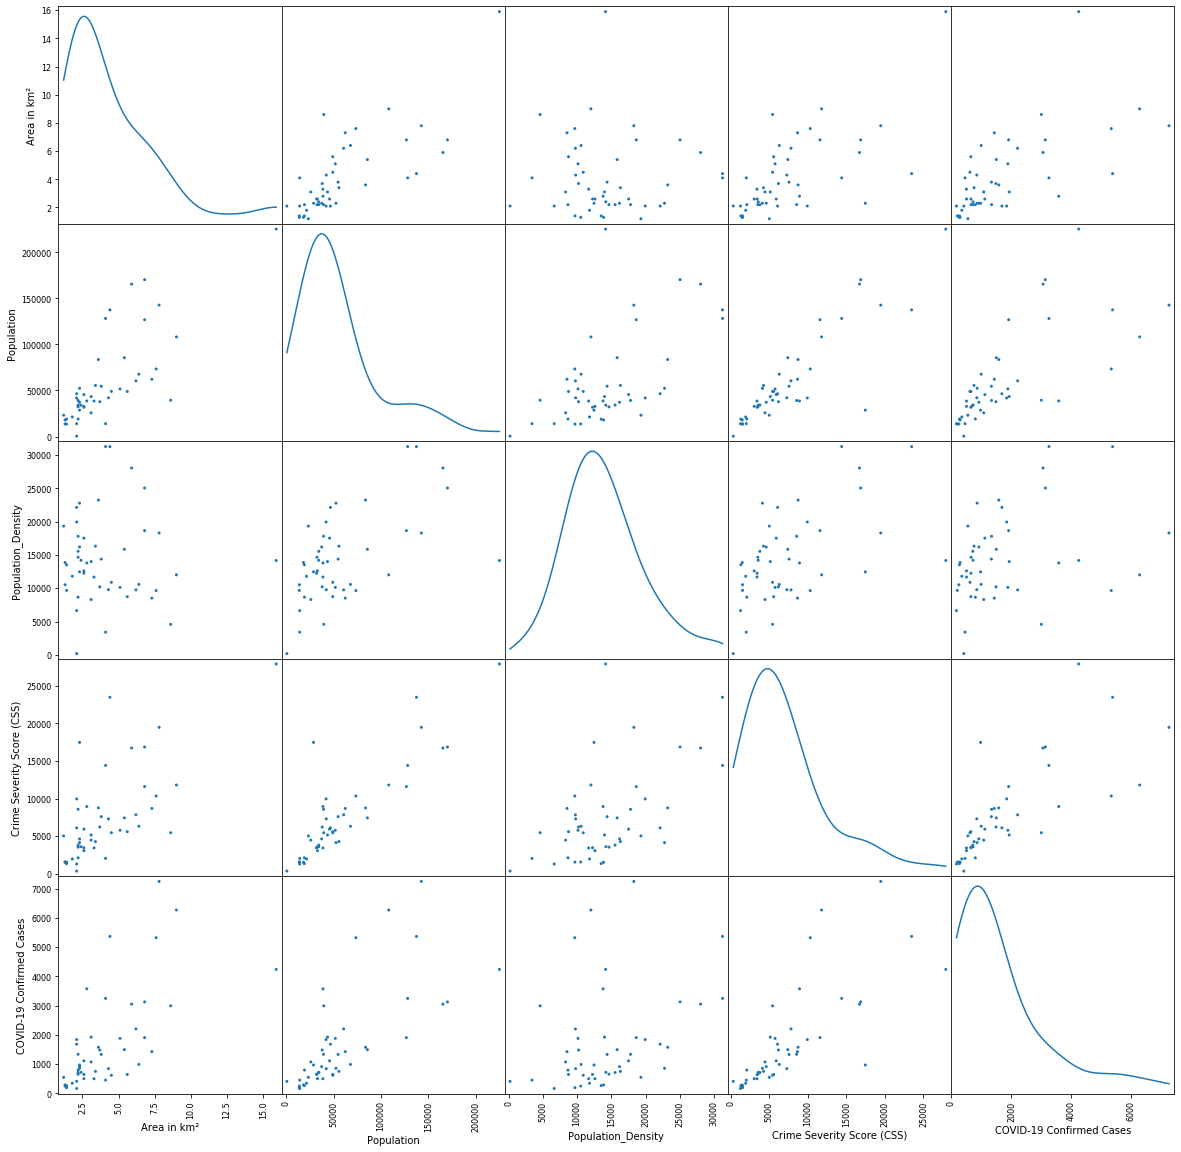

In [30]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
#SM_WorkingDF=WorkingDF[["Neighbourhood", "Area in km²", "Population", "Crime Severity Score (CSS)", "COVID-19 Cummulative Confirmed Cases"]]

scatter_matrix(WorkingDF, alpha = 1, figsize = (20, 20), diagonal = 'kde')
plt.yticks(rotation=0) 
plt.savefig('scatter_matrix.jpg')
#plt.xlabel(rotation=90) 

## Correlation Matrix 


In [31]:
corr=WorkingDF.corr()
print(type(corr.style.background_gradient(cmap='coolwarm').set_precision(2)))
styled_table=corr.style.background_gradient(cmap='coolwarm').set_precision(2)
#html = styled_table.render()
#import imgkit
#imgkit.from_string(html, 'styled_table.jpg')
styled_table
#.savefig('Correlation_Matrix.jpg')


<class 'pandas.io.formats.style.Styler'>


## Scale the risk metric by 'population density'


In [32]:
WorkingDF['CSS Index'] = WorkingDF['Crime Severity Score (CSS)']/WorkingDF["Population_Density"] 
WorkingDF['COVID-19 Index'] = WorkingDF['COVID-19 Confirmed Cases']/WorkingDF["Population_Density"] 
WorkingDF.head(3)

Neighbourhood  Area in km²  Population  Population_Density  \
0     AGRONOMIA          2.1       13963         6649.047619   
1       ALMAGRO          4.1      128206        31269.756098   
2     BALVANERA          4.4      137521        31254.772727   

   Crime Severity Score (CSS)  COVID-19 Confirmed Cases  CSS Index  \
0                        1288                       166   0.193712   
1                       14406                      3251   0.460701   
2                       23474                      5372   0.751053   

   COVID-19 Index  
0        0.024966  
1        0.103966  
2        0.171878

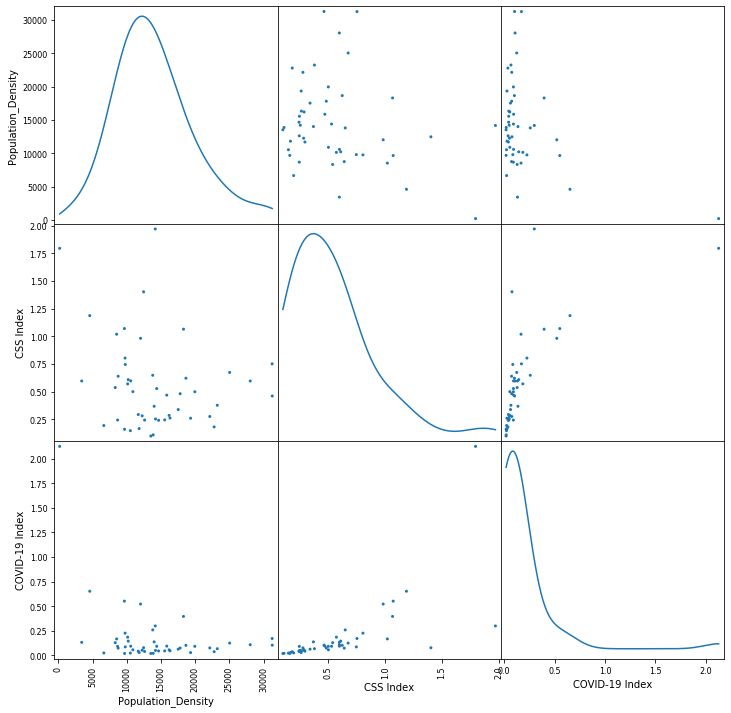

In [33]:
from pandas.plotting import scatter_matrix
#SM_WorkingDF=WorkingDF[["Neighbourhood", "Area in km²", "Population", "Crime Severity Score (CSS)", "COVID-19 Cummulative Confirmed Cases"]]
WorkingDF_Screen=WorkingDF[['Population_Density','CSS Index', 'COVID-19 Index']]
scatter_matrix(WorkingDF_Screen, alpha = 1, figsize = (12, 12), diagonal = 'kde')
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
plt.savefig('scatter_matrix_selected.jpg')
#plt.xlabel(rotation=90) 

In [34]:
corr2=WorkingDF_Screen.corr()
corr2.style.background_gradient(cmap='coolwarm').set_precision(2)

## List up Outliers

Here, we can confirm the highly skewed distribution of the data for all these

Especially, the boxplot is useful to visually identify outliers, which apprea above the top whisker.

Now, let's list up these outliers over the top whisker of the Boxplot.

Let me use *__item.get__*  to list up these outliers above (inclusively the upper whisker) *__the upper whisker__* of the boxplot.

Source : https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib


In [35]:
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


## Distribution of Crime across different Neighbourhoods in Buenos Aires

Now, let's take a look at the distribution of crime across different Neighbours in Buenos Aires.
First, we can use the total crime severity scores measures (CSS).

Distribution of Neighbourhoods into Bins:  [17  6 13  4  2  3  1  0  0  2]
The ranges of the Bins:  [0.09882701 0.28592515 0.47302329 0.66012144 0.84721958 1.03431772
 1.22141586 1.408514   1.59561215 1.78271029 1.96980843]


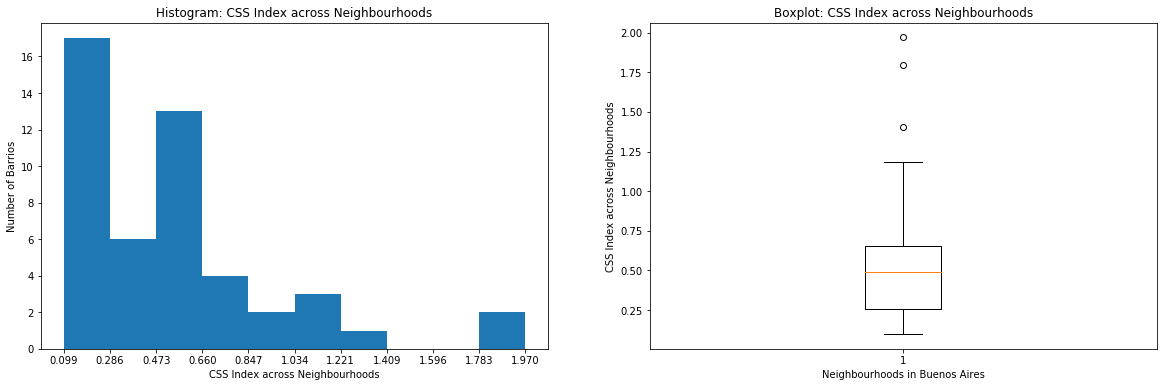

In [36]:
# Use np.histogram method to generate 10 bins out of the data
bin_count=10
count, bin_edges = np.histogram(WorkingDF['CSS Index'], bins=bin_count)

print("Distribution of Neighbourhoods into Bins: ", count) # frequency count
print("The ranges of the Bins: ", bin_edges) # bin ranges, default = 10 bins

# Prepare for 2 Subplots Space: Histogram and Boxplot
plt.figure(figsize=(20, 6))

# Create a Histogram
plt.subplot(1,2,1)

# to divide data into 10 bins
count, bin_edges = np.histogram(WorkingDF['CSS Index'] , bins=bin_count)
plt.title('Histogram: CSS Index across Neighbourhoods') # add a title to the histogram

plt.hist(WorkingDF['CSS Index'] )
plt.xticks(bin_edges)
plt.ylabel('Number of Barrios') # add y-label
plt.xlabel('CSS Index across Neighbourhoods') # add x-label

#plt.legend(loc='right')

plt.subplot(1,2,2)
plt.title('Boxplot: CSS Index across Neighbourhoods') # add a title to the histogram
CSS=plt.boxplot(WorkingDF['CSS Index'] )
plt.ylabel('CSS Index across Neighbourhoods') # add y-label
plt.xlabel('Neighbourhoods in Buenos Aires') # add x-label
#plt.xlabel("")
plt.savefig('CSS.jpg')

 * The distribution of CSS Index across different Neighbourhoods is asymmetric and significantly skewed.
 * The box plot projects the top 4 Neighbourhoods beyond *__the upper Whisker__* thus interprets them as *__outliers__*.



### CSS Index Outliers

Let me use *__item.get__*  to list up these outliers above (inclusively the upper whisker) *__the upper whisker__* of the boxplot.

Source : https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib

The following 4 Neighbourhoods are outliers in the crime severity according to 'CSS Index'.
 * The 4th Neighbourhood, 'Villa Soldati' is positioned at *__the upper whisker__*.

In [37]:
B=[item.get_ydata() for item in CSS['whiskers']][1][1]

CSS_Outlier=WorkingDF[WorkingDF['CSS Index']>=B]
CSS_Outlier_List=CSS_Outlier[['Neighbourhood','CSS Index']].sort_values('CSS Index', ascending=False).reset_index()
CSS_Outlier_List["Outlier"]='CSS Outliers'
CSS_Outlier_List

index  Neighbourhood  CSS Index       Outlier
0     21        PALERMO   1.969808  CSS Outliers
1     26  PUERTO MADERO   1.794828  CSS Outliers
2     31    SAN NICOLAS   1.401807  CSS Outliers
3     46  VILLA SOLDATI   1.186620  CSS Outliers


## Distribution of COVID-19 Confirmed Cases
Next, let me do the same thing with COVID-19 Index


Distribution of Neighbourhoods into Bins:  [41  3  2  1  0  0  0  0  0  1]
The ranges of the Bins:  [0.01960266 0.2302286  0.44085454 0.65148048 0.86210643 1.07273237
 1.28335831 1.49398425 1.70461019 1.91523613 2.12586207]


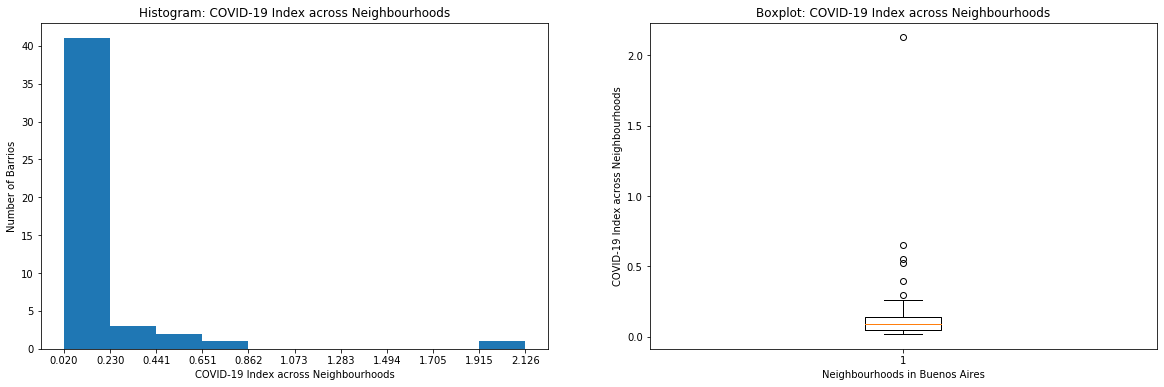

In [38]:
# Use np.histogram method to generate 10 bins out of the data
bin_count=10
#count, bin_edges = np.histogram(WorkingDF['COVID-19 Index'], bins=bin_count)
count, bin_edges = np.histogram(WorkingDF['COVID-19 Index'], range=(np.nanmin(WorkingDF['COVID-19 Index']), np.nanmax(WorkingDF['COVID-19 Index'])), bins=bin_count)



print("Distribution of Neighbourhoods into Bins: ", count) # frequency count
print("The ranges of the Bins: ", bin_edges) # bin ranges, default = 10 bins

# Prepare for 2 Subplots Space: Histogram and Boxplot
plt.figure(figsize=(20, 6))

# Create a Histogram
plt.subplot(1,2,1)

# to divide data into 10 bins
count, bin_edges = np.histogram(WorkingDF['COVID-19 Index'], range=(np.nanmin(WorkingDF['COVID-19 Index']), np.nanmax(WorkingDF['COVID-19 Index'])), bins=bin_count)
plt.title('Histogram: COVID-19 Index across Neighbourhoods') # add a title to the histogram

plt.hist(WorkingDF['COVID-19 Index'])
plt.xticks(bin_edges)
plt.ylabel('Number of Barrios') # add y-label
plt.xlabel('COVID-19 Index across Neighbourhoods') # add x-label

#plt.legend(loc='right')

plt.subplot(1,2,2)
plt.title('Boxplot: COVID-19 Index across Neighbourhoods') # add a title to the histogram
COVID = plt.boxplot(WorkingDF['COVID-19 Index'])
#plt.boxplot(WorkingDF['COVID-19 Index'])
plt.ylabel('COVID-19 Index across Neighbourhoods') # add y-label
plt.xlabel('Neighbourhoods in Buenos Aires') # add x-label
#plt.xlabel("")
plt.savefig('COVID19.jpg')

### COVID-19 Outliers:
Next, let's list up these 6 COVID-19 outlier Neighbourhoods.

Let me use *__item.get__*  to list up these outliers above (inclusively the upper whisker) *__the upper whisker__* of the boxplot.

 * The 7th Neighbourhood, Villa Soldati, is positioned at *__the upper whisker__*.

Source : https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib

In [39]:
B=[item.get_ydata() for item in COVID['whiskers']][1][1]

COVID19_Outlier=WorkingDF[WorkingDF['COVID-19 Index']>=B]
COVID19_Outlier_List=COVID19_Outlier[['Neighbourhood','COVID-19 Index']].sort_values('COVID-19 Index', ascending=False).reset_index()
COVID19_Outlier_List["Outlier"]='COVID-19 Outlier'
COVID19_Outlier_List

index  Neighbourhood  COVID-19 Index           Outlier
0     26  PUERTO MADERO        2.125862  COVID-19 Outlier
1     46  VILLA SOLDATI        0.652674  COVID-19 Outlier
2      3       BARRACAS        0.551846  COVID-19 Outlier
3     39   VILLA LUGANO        0.522012  COVID-19 Outlier
4     11         FLORES        0.396518  COVID-19 Outlier
5     21        PALERMO        0.299513  COVID-19 Outlier
6     28         RETIRO        0.259236  COVID-19 Outlier

Thus, when we merge these two sets of outliers (one for COVID-19 Index; the other for CSS Index).


In [40]:
Outlier_Set = pd.merge(COVID19_Outlier_List,CSS_Outlier_List,on='Neighbourhood',how='outer')
#pd.concat([CSS_Outlier, COVID19_Outlier])
Box_Plost_Outliers_List=Outlier_Set["Neighbourhood"]
#[["Neighbourhood", 'Index']]
Box_Plost_Outliers_List

0    PUERTO MADERO
1    VILLA SOLDATI
2         BARRACAS
3     VILLA LUGANO
4           FLORES
5          PALERMO
6           RETIRO
7      SAN NICOLAS
Name: Neighbourhood, dtype: object


Let me make a *__scatterplot__* of these two indeces.

s : 48


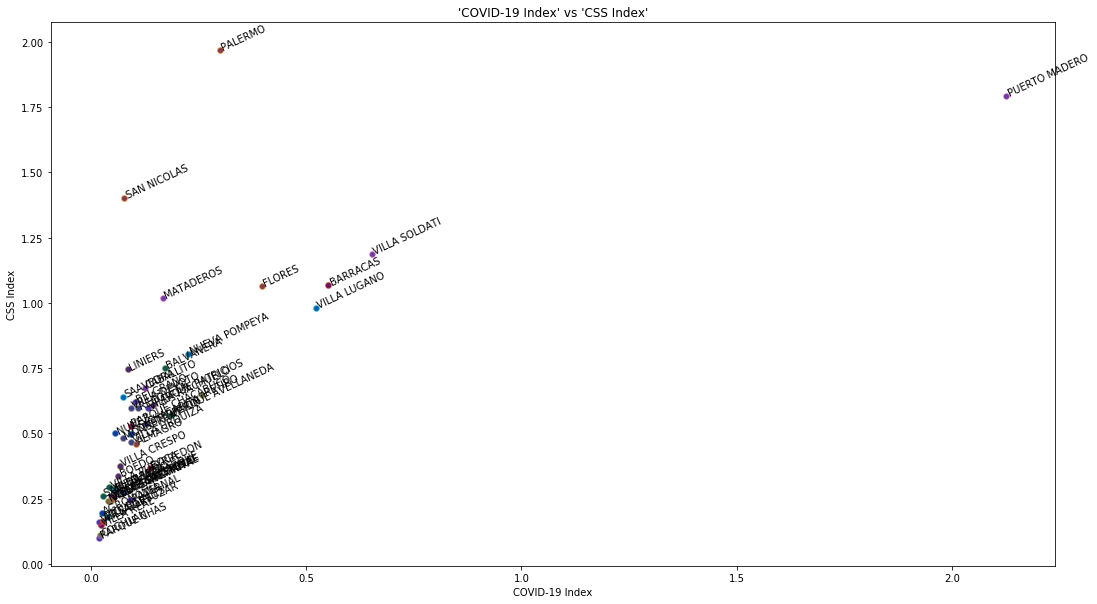

<Figure size 432x288 with 0 Axes>

In [41]:
WorkingDF[['COVID-19 Index', 'CSS Index']].plot(kind='scatter', x='COVID-19 Index', y='CSS Index', figsize=(18, 10), color='darkblue')
names=WorkingDF["Neighbourhood"]

s=0
for label in names:
    subset = WorkingDF[WorkingDF.Neighbourhood == label]
    for i in subset.index:
            plt.text(subset["COVID-19 Index"][i], subset["CSS Index"][i], str(subset['Neighbourhood'][i]), rotation=25) 
    plt.scatter(subset["COVID-19 Index"], subset["CSS Index"],alpha=0.5)
    s += 1
print("s :", s)
plt.title("'COVID-19 Index' vs 'CSS Index'")
plt.xlabel('COVID-19 Index')
plt.ylabel('CSS Index')


plt.show()
plt.savefig('CSS_COVID_Space.jpg')

*__Boxplot__* does identify outliers in its own way based on the distribution of the data points. 

So does *__the scatterplot__* in its own way, as the spatial data over the "CSS Index" vs "COVID-19 Index" Space.

For the particular case of these data, *__Boxplot__* provides us with a clear cut list of the outliers, in comparison with *__the scatterplot__*. 

Although *__Boxplot__* gave us an already good answer, I would like to explore Clustering Machine Learning to identify outliers. Next, I will try *__DBSCAN__*.

# B. Methodology and Analysis Part I: Risk Analysis <a name="methodology1"></a>

I am going to perform two clustering models in this section.

First, we need to standardize/normalize the data before passing it to the clustering model.

### Normalize/Standardize the data

ML Libraries provides us with useful tools. But, we need to pass standardised/normalized set of data to be effective.

In the next cell, I will standardize the data.

In [42]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
X=WorkingDF[['COVID-19 Index', 'CSS Index']]
X_standardized=StandardScaler().fit_transform(X)
X_standardized
#WorkingDF['Standard_Scaled COVID-19 Index']=X_standardized.iloc[:, 0]

array([[-4.58215450e-01, -8.94745175e-01],
       [-2.08952826e-01, -2.40608496e-01],
       [ 5.32224135e-03,  4.70770613e-01],
       [ 1.20420224e+00,  1.25177319e+00],
       [-2.14351510e-01,  1.53015376e-01],
       [-3.36594421e-01, -5.41118576e-01],
       [-1.42672655e-01,  2.80457230e-01],
       [-1.29092438e-01, -5.40881520e-02],
       [-4.71436479e-01, -1.10176222e+00],
       [-4.18418793e-01, -9.25131187e-01],
       [-2.45816324e-01, -1.47241508e-01],
       [ 7.14111144e-01,  1.23776622e+00],
       [-3.58910018e-01, -6.69933174e-01],
       [-1.03276741e-01, -4.68350126e-01],
       [-2.47062580e-01, -7.73716108e-01],
       [-2.64563412e-01,  4.56659608e-01],
       [-8.24220011e-03,  1.12631235e+00],
       [-3.00083769e-01, -1.90747606e-01],
       [-4.11365132e-01, -7.74347535e-01],
       [ 1.76721314e-01,  5.98748047e-01],
       [-3.58273115e-01, -1.44898036e-01],
       [ 4.08036963e-01,  3.45678522e+00],
       [ 4.87203899e-02,  2.67509250e-02],
       [-2.

## B1. Objective 1: Density Based Spatial Clustering for Application with Noise
### DBSCAN Hyperparameter Tuning: 'eps'

FIrst, I want to run DBSCAN clustering for the first objective to identify outliers.

Now, let me tune the most important hyperparameter of DBSCAN, *__eps__**.

Mind here to pass the standardized data to *__.sklearn.cluster's DBSCAN__*

Next, let's find the best 'eps'.

### Knee Point/ Elbow Point
> "*Computer systems often reach a point at which the relative cost to increase some tunable parameter is no longer worth the corresponding performance benefit. These "knees'' typically represent beneficial points that system designers have long selected to best balance inherent trade-offs."* (Source: https://ieeexplore.ieee.org/document/5961514) 

* Code source: https://towardsdatascience.com/how-to-use-dbscan-effectively-ed212c02e62)

In order to find the knee point (or elbow point), we will use *__KneeLocator__* of the python library *__kneed__*.

First let's install *__kneed__*: https://pypi.org/project/kneed/

In [43]:
!pip install kneed
from kneed import KneeLocator


knee:  <kneed.knee_locator.KneeLocator object at 0x0000028AC9DD7E88>
Distance at Knee:  0.49


<Figure size 360x360 with 0 Axes>

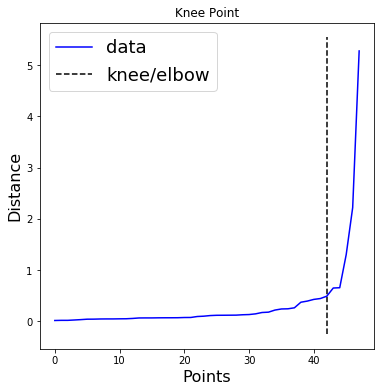

In [44]:
K=3
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=K)
neighbors = nearest_neighbors.fit(X_standardized)
distances, indices = neighbors.kneighbors(X_standardized)

distances = np.sort(distances[:,K-1], axis=0)

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print('knee: ', knee)
fig = plt.figure(figsize=(5, 5))

knee.plot_knee()

plt.xlabel("Points", fontsize=16)
plt.ylabel("Distance", fontsize=16)
plt.legend(loc='upper left', fontsize=18)
knee_eps=distances[knee.knee]
K_EPS=round(knee_eps,3)
print("Distance at Knee: ", K_EPS)
plt.savefig("Distance_curve.jpg", dpi=300)


Now, *__the Knee Poiny__* is pointing at the distance at Knee or the best eps, *__"knee_eps"__*, at *__0.49__*.

Next, we can plug the best eps into DBSCAN model and see the plot.

<class 'numpy.ndarray'> [ 0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0 -1  0  0  0  0 -1  0  0
  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0]


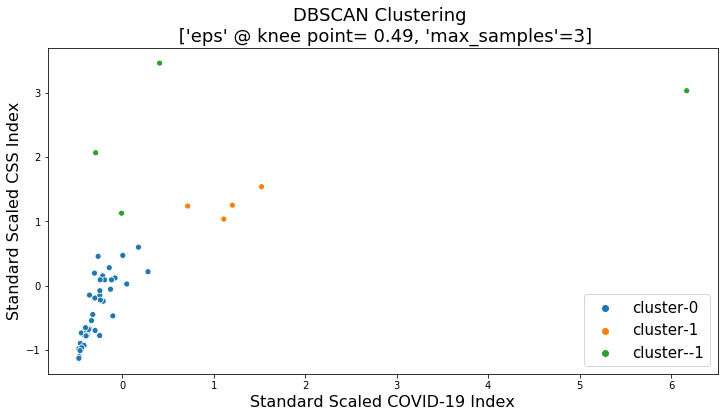

In [45]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=knee_eps, min_samples=K).fit(X_standardized)
labels_outlier = db.labels_
print(type(labels_outlier), labels_outlier)
fig = plt.figure(figsize=(12, 6))
sns.scatterplot(X_standardized[:,0], X_standardized[:,1], hue=["cluster-{}".format(x) for x in labels_outlier])
plt.xlabel('Standard Scaled COVID-19 Index', fontsize=16)
plt.ylabel('Standard Scaled CSS Index', fontsize=16)
plt.title("DBSCAN Clustering \n ['eps' @ knee point= {}, 'max_samples'={}]".format(round(knee_eps,3), K), fontsize=18)
plt.legend(loc='lower right', fontsize=15)
plt.savefig('DBSCAN.jpg')

The output displays a visual information of the outcome of hierarchical clusering.

For the comparison purpose, the next cell would plot the cluster with different 'eps'.
I would say, *__the knee point__* gives us sufficient information about outlier clusters.

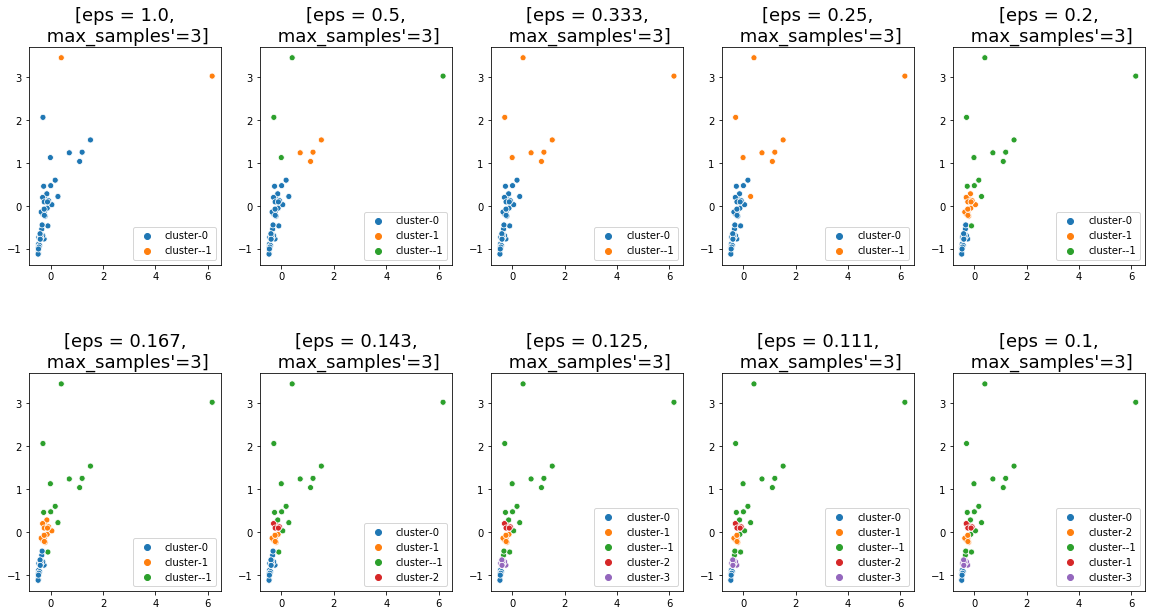

In [46]:
import seaborn as sns
from sklearn.cluster import DBSCAN

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for e in range(10, 0, -1):
    eps = 1/(11-e)
    db = DBSCAN(eps=eps, min_samples=K).fit(X_standardized)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    #print(eps)
    ax = fig.add_subplot(2, 5, i)
    sns.scatterplot(X_standardized[:,0], X_standardized[:,1], hue=["cluster-{}".format(x) for x in labels])
    ax.legend(loc="lower right")
    ax.set_title("[eps = {},\n max_samples'={}]".format(round(eps, 3), K), fontsize=18, loc="center")
    i += 1
plt.savefig('multi_eps_DBSCAN.jpg')

Now, after comparison, I would finally select *__the knee point__* for *__'eps'__* and register the resulting clusters into the dataframe, *__WorkingDF__*


*__supervised machine learning__* has actual values for both feture variables and response in the dataset. *__clustering__* is *__unsupervised__* and has no actual labelled response (dependent variable) in the actual dataset. It makes impossible to validate the fitting of the model based on an objective actual data. Thus, it would require *__human judgement or business understanding__* to a greater extent, compared with *__supervised machine learning__*.

Now, I need to use my judgement to determine what are outliers. Here, I would treat two clusters, "Cluster 1" (Orange) and "Cluster -1" (Light Green), as outlier clusters.

Let's also list up those 8 outliers in the CSS-COVID-19 Indices Space.

In [47]:
WorkingDF["Outlier_Clusters"]=labels_outlier
Outlier_Cluster=pd.concat([WorkingDF[WorkingDF["Outlier_Clusters"]==-1],WorkingDF[WorkingDF["Outlier_Clusters"]==1]])
Outlier_Cluster_List=Outlier_Cluster['Neighbourhood']
print("Outlier_Cluster_List: ", Outlier_Cluster_List, type(Outlier_Cluster_List))

Outlier_Cluster_List:  16        MATADEROS
21          PALERMO
26    PUERTO MADERO
31      SAN NICOLAS
3          BARRACAS
11           FLORES
39     VILLA LUGANO
46    VILLA SOLDATI
Name: Neighbourhood, dtype: object <class 'pandas.core.series.Series'>


For the sake of comparison, once again, let me list up the Boxplot version of outliers.

In [48]:
print("Box_Plost_Outliers_List: ", Box_Plost_Outliers_List, type(Box_Plost_Outliers_List))


Box_Plost_Outliers_List:  0    PUERTO MADERO
1    VILLA SOLDATI
2         BARRACAS
3     VILLA LUGANO
4           FLORES
5          PALERMO
6           RETIRO
7      SAN NICOLAS
Name: Neighbourhood, dtype: object <class 'pandas.core.series.Series'>


## Same Result between Boxplot and DBSCAN Machine Learning!

Expectedly, the results are the same between *__Boxplot__* and *__DBSCAN Machine Learning__*.

This means, in some case, we would not necessarily need a sophisticated tool, such as Clustering Machine Learning to find outliers. From the cost-benefit perspective, *__Boxplot__* provides us with a cheap mean for a good enough performance.

## Clustering excluding Outliers

Next, I would like to discover the underlying structure/cluster of *__the Non-Outlier dataset__*. 

In other words:
 * drop two clusters, "Cluster 1" (Light Green) and "Cluster -1" (Orange) as outliers. 
 * keep only the "Cluster 0" (Light Blue) in the Non-Outlier dataframe, *__'WorkingDF2'__*, for the further analysis.
 * discover hidden structure/cluster of *__the Non-Outlier dataset in 'WorkingDF2'__*.
 

In [49]:
#WorkingDF2=WorkingDF.drop(WorkingDF[WorkingDF["Neighbourhood"]=='NUNEZ'].index)
WorkingDF2=WorkingDF[WorkingDF.Outlier_Clusters==0].reset_index()

WorkingDF2.shape

(40, 10)

Based on the shape of the new dataframe (40, 10), I confirmed that 8 outliers were removed. 

## Standardization
For the new round of clustering with *__the Non-Outlier dataset'__*, let me standardize 'COVID-19 Index' and 'CSS Index' *__in 'WorkingDF2'__*.

For the calculation of the compound risk metric, I will need to identify the calculation of the risk-free position in the standardised space.

Here, I will append a row to insert the Origin, the Riskless Point (0,0).

In [50]:
WorkingDF2_X = WorkingDF2[["Neighbourhood", 'CSS Index', 'COVID-19 Index']]
Origin = pd.DataFrame([["The Origin", 0,0]], columns=["Neighbourhood", "CSS Index", "COVID-19 Index"])
WorkingDF2_X=WorkingDF2_X.append(Origin, ignore_index=True)
WorkingDF2_X

Neighbourhood  CSS Index  COVID-19 Index
0           AGRONOMIA   0.193712        0.024966
1             ALMAGRO   0.460701        0.103966
2           BALVANERA   0.751053        0.171878
3            BELGRANO   0.621360        0.102255
4               BOEDO   0.338046        0.063512
5           CABALLITO   0.673376        0.124973
6           CHACARITA   0.536830        0.129277
7             COGHLAN   0.109217        0.020776
8          COLEGIALES   0.181310        0.037579
9        CONSTITUCION   0.498809        0.092283
10           FLORESTA   0.285470        0.056439
11               BOCA   0.367747        0.137459
12           PATERNAL   0.243111        0.091888
13            LINIERS   0.745294        0.086341
14          MONSERRAT   0.481052        0.075084
15       MONTE CASTRO   0.242853        0.039815
16      NUEVA POMPEYA   0.803288        0.226200
17              NUNEZ   0.499765        0.056641
18  PARQUE AVELLANEDA   0.569825        0.185632
19   PARQUE CHACABUCO   0.527527        0.092639
20        PARQUE CHAS   0.098827        0.019603
21   PARQUE PATRICIOS   0.608100        0.145196
22           RECOLETA   0.595939        0.108842
23             RETIRO   0.647765        0.259236
24           SAAVEDRA   0.638859        0.073895
25      SAN CRISTOBAL   0.275384        0.075971
26          SAN TELMO   0.259781        0.028347
27    VELEZ SARSFIELD   0.252717        0.050628
28          VERSALLES   0.159664        0.020035
29       VILLA CRESPO   0.376716        0.067915
30   VILLA DEL PARQUE   0.261576        0.046128
31       VILLA DEVOTO   0.596597        0.093573
32  VILLA GRAL. MITRE   0.244544        0.045796
33         VILLA LURO   0.281553        0.052883
34      VILLA ORTUZAR   0.165977        0.029300
35   VILLA PUEYRREDON   0.293044        0.042793
36         VILLA REAL   0.147380        0.023661
37    VILLA RIACHUELO   0.596177        0.132712
38   VILLA SANTA RITA   0.240958        0.044753
39      VILLA URQUIZA   0.468281        0.094388
40         The Origin   0.000000        0.000000

In [51]:

import seaborn as sns
from sklearn.preprocessing import StandardScaler
X2 = WorkingDF2_X[['CSS Index', 'COVID-19 Index']]
X2_standardized=StandardScaler().fit_transform(X2)
X2_standardized.shape

(41, 2)

In [52]:
StandardizedIndices=pd.DataFrame(X2_standardized, columns=["Standardized CSS Index", "Standardized COVID-19 Index"])
StandardizedIndices

Standardized CSS Index  Standardized COVID-19 Index
0                -0.998509                    -1.016310
1                 0.303018                     0.383489
2                 1.718440                     1.586806
3                 1.086207                     0.353171
4                -0.294903                    -0.333315
5                 1.339776                     0.755702
6                 0.674135                     0.831966
7                -1.410408                    -1.090556
8                -1.058967                    -0.792821
9                 0.488789                     0.176472
10               -0.551203                    -0.458634
11               -0.150116                     0.976940
12               -0.757699                     0.169474
13                1.690363                     0.071193
14                0.402226                    -0.128280
15               -0.758955                    -0.753210
16                1.973075                     2.549342
17                0.493452                    -0.455058
18                0.834980                     1.830520
19                0.628784                     0.182779
20               -1.461057                    -1.111342
21                1.021565                     1.114034
22                0.962285                     0.469882
23                1.214926                     3.134707
24                1.171513                    -0.149342
25               -0.600371                    -0.112555
26               -0.676433                    -0.956397
27               -0.710870                    -0.561609
28               -1.164489                    -1.103674
29               -0.106393                    -0.255304
30               -0.667682                    -0.641341
31                0.965492                     0.199328
32               -0.750708                    -0.647228
33               -0.570297                    -0.521650
34               -1.133714                    -0.939516
35               -0.514280                    -0.700440
36               -1.224372                    -1.039441
37                0.963444                     0.892826
38               -0.768194                    -0.665703
39                0.339973                     0.213775
40               -1.942823                    -1.458680

Let's keep a note on the Standardized Position of the Origin, the risk-less position.


In [53]:
Standardized_Origin=StandardizedIndices.iloc[[40]]
print(type(Standardized_Origin))
Standardized_Origin

<class 'pandas.core.frame.DataFrame'>


Standardized CSS Index  Standardized COVID-19 Index
40               -1.942823                     -1.45868

Add the standardized positions in the working file of WOrkingDF2.

In [54]:
WorkingDF2=WorkingDF2.join(StandardizedIndices)
WorkingDF2

index      Neighbourhood  Area in km²  Population  Population_Density  \
0       0          AGRONOMIA          2.1       13963         6649.047619   
1       1            ALMAGRO          4.1      128206        31269.756098   
2       2          BALVANERA          4.4      137521        31254.772727   
3       4           BELGRANO          6.8      126816        18649.411765   
4       5              BOEDO          2.6       45563        17524.230769   
5       6          CABALLITO          6.8      170309        25045.441176   
6       7          CHACARITA          3.1       25778         8315.483871   
7       8            COGHLAN          1.3       18021        13862.307692   
8       9         COLEGIALES          2.3       52391        22778.695652   
9      10       CONSTITUCION          2.1       41894        19949.523810   
10     12           FLORESTA          2.3       37247        16194.347826   
11     13               BOCA          3.1       43413        14004.193548   
12     14           PATERNAL          2.2       19058         8662.727273   
13     15            LINIERS          4.3       42083         9786.744186   
14     17          MONSERRAT          2.2       39175        17806.818182   
15     18       MONTE CASTRO          2.6       32782        12608.461538   
16     19      NUEVA POMPEYA          6.2       60465         9752.419355   
17     20              NUNEZ          4.5       49019        10893.111111   
18     22  PARQUE AVELLANEDA          5.1       51678        10132.941176   
19     23   PARQUE CHACABUCO          3.8       54638        14378.421053   
20     24        PARQUE CHAS          1.4       18926        13518.571429   
21     25   PARQUE PATRICIOS          3.7       37791        10213.783784   
22     27           RECOLETA          5.9      165494        28049.830508   
23     28             RETIRO          2.8       38635        13798.214286   
24     29           SAAVEDRA          5.6       48956         8742.142857   
25     30      SAN CRISTOBAL          2.1       46494        22140.000000   
26     32          SAN TELMO          1.2       23198        19331.666667   
27     33    VELEZ SARSFIELD          2.4       34084        14201.666667   
28     34          VERSALLES          1.4       13556         9682.857143   
29     35       VILLA CRESPO          3.6       83646        23235.000000   
30     36   VILLA DEL PARQUE          3.4       55502        16324.117647   
31     37       VILLA DEVOTO          6.4       67712        10580.000000   
32     38  VILLA GRAL. MITRE          2.2       34204        15547.272727   
33     40         VILLA LURO          2.6       31859        12253.461538   
34     41      VILLA ORTUZAR          1.8       21256        11808.888889   
35     42   VILLA PUEYRREDON          3.3       38558        11684.242424   
36     43         VILLA REAL          1.3       13681        10523.846154   
37     44    VILLA RIACHUELO          4.1       13995         3413.414634   
38     45   VILLA SANTA RITA          2.2       32248        14658.181818   
39     47      VILLA URQUIZA          5.4       85587        15849.444444   

    Crime Severity Score (CSS)  COVID-19 Confirmed Cases  CSS Index  \
0                         1288                       166   0.193712   
1                        14406                      3251   0.460701   
2                        23474                      5372   0.751053   
3                        11588                      1907   0.621360   
4                         5924                      1113   0.338046   
5                        16865                      3130   0.673376   
6                         4464                      1075   0.536830   
7                         1514                       288   0.109217   
8                         4130                       856   0.181310   
9                         9951                      1841   0.498809   
10                        4623                       914   0.2854

## B2. Objective 2: Hierarchical Clustering

For the second objective, I choose Hierarchical Clustering model. Here are the reasons why I select this particular model for the second objective: 

 * I have no advance knowledge how many underlying clusters are expected in the dataset. Many clustering models, paradoxically, require the number of clusters as a hyperparameter input to tune the models a priori. But, Hierarchical Clustering doesn’t. 

 * In addition, Hierarchical Clustering algorithm can generate a dendrogram that illustrates a tree-like cluster structure based on the hierarchical structure of the pairwise spatial distance distribution. The ‘dendrogram’ appeals to our human intuition in discovering the underlying cluster structure. 

1. Advantage and Disadvantage

 a) Advantages:
   There are three main advantages to using hierarchical clustering.
    * First, we do not need to specify the number of clusters required for the algorithm.
    * Second, hierarchical clustering is easy to implement.
    * And third, the dendrogram produced is very useful in understanding the data.
    
 b) Disadvantage:
   There are some disadvantages as well.
    * First, the algorithm can never undo any previous steps. So for example, the algorithm clusters two points and later on, we see that the connection was not a good one. The program can not undo that step. 
    * Second, the time complexity for the clustering can result in very long computation times in comparison with efficient algorithms such as K-means.
    * Finally, if we have a large data set, it can become difficult to determine the correct number of clusters by the dendrogram.
    
In the next cell, I will calculate *__the Distance Matrix__* with the newly Normalized Data, *__X_standardized__*

In [55]:
import scipy
leng = X2_standardized.shape[0]
D2 = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D2[i,j] = scipy.spatial.distance.euclidean(X2_standardized[i], X2_standardized[j])      

C:\Users\msugi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
D2=D2[:40, :40]

D2.shape

(40, 40)

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. 
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:
    - single
    - complete
    - average
    - weighted
    - centroid
    
    
And I will use __centroid__ for the analysis.

In [57]:
import pylab
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

Z2 = scipy.cluster.hierarchy.linkage(D2, 'centroid')

C:\Users\msugi\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering.
So you can use a cutting line:

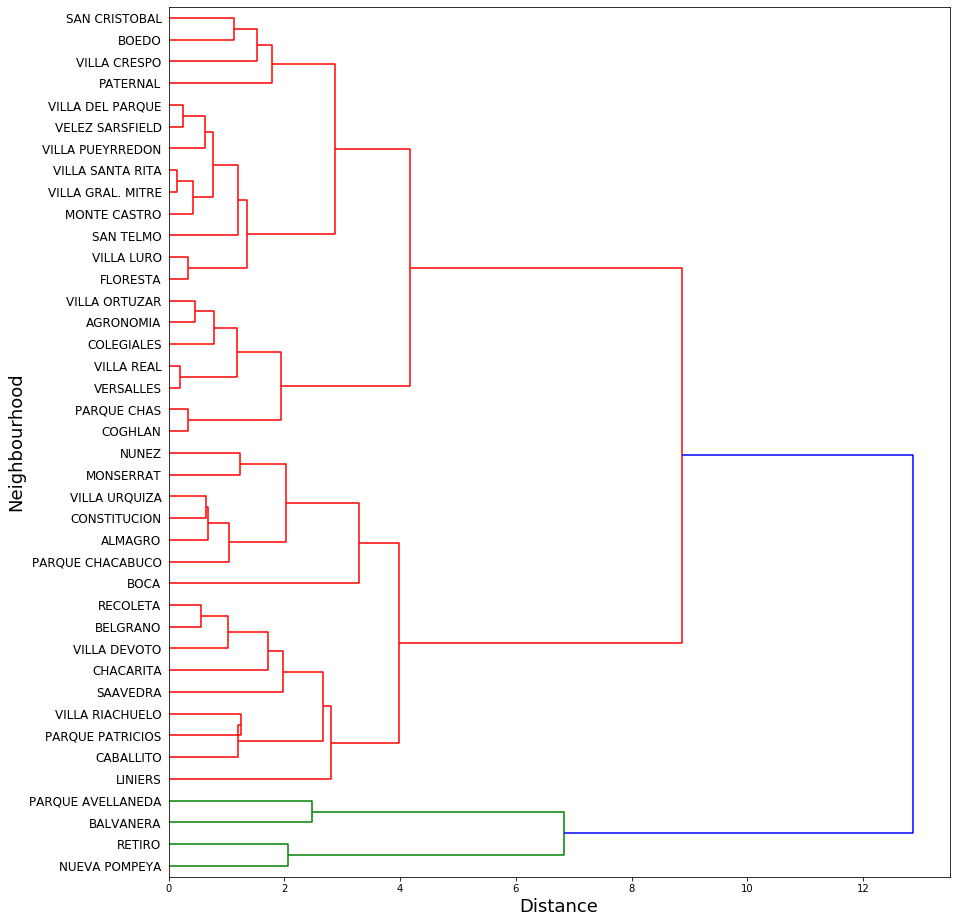

In [58]:
fig = pylab.figure(figsize=(14,16))

def llf(id):
    return '%s' % (WorkingDF2["Neighbourhood"][id])
    
dendro = scipy.cluster.hierarchy.dendrogram(Z2, leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

plt.ylabel('Neighbourhood', fontsize=18)
plt.xlabel('Distance', fontsize=18)
plt.savefig('Hierarchical_Dendrogram.jpg')

Now, based on dendrogram, I would like to choose 5 for the number of clusters and see how the data points are going to be segmented into 5 clusters:

In [59]:
from scipy.cluster.hierarchy import fcluster
N_Clus = 4
clusters = fcluster(Z2, N_Clus, criterion='maxclust')
clusters.shape
#clusters
WorkingDF2.loc[:, "Cluster"]=clusters
WorkingDF2

index      Neighbourhood  Area in km²  Population  Population_Density  \
0       0          AGRONOMIA          2.1       13963         6649.047619   
1       1            ALMAGRO          4.1      128206        31269.756098   
2       2          BALVANERA          4.4      137521        31254.772727   
3       4           BELGRANO          6.8      126816        18649.411765   
4       5              BOEDO          2.6       45563        17524.230769   
5       6          CABALLITO          6.8      170309        25045.441176   
6       7          CHACARITA          3.1       25778         8315.483871   
7       8            COGHLAN          1.3       18021        13862.307692   
8       9         COLEGIALES          2.3       52391        22778.695652   
9      10       CONSTITUCION          2.1       41894        19949.523810   
10     12           FLORESTA          2.3       37247        16194.347826   
11     13               BOCA          3.1       43413        14004.193548   
12     14           PATERNAL          2.2       19058         8662.727273   
13     15            LINIERS          4.3       42083         9786.744186   
14     17          MONSERRAT          2.2       39175        17806.818182   
15     18       MONTE CASTRO          2.6       32782        12608.461538   
16     19      NUEVA POMPEYA          6.2       60465         9752.419355   
17     20              NUNEZ          4.5       49019        10893.111111   
18     22  PARQUE AVELLANEDA          5.1       51678        10132.941176   
19     23   PARQUE CHACABUCO          3.8       54638        14378.421053   
20     24        PARQUE CHAS          1.4       18926        13518.571429   
21     25   PARQUE PATRICIOS          3.7       37791        10213.783784   
22     27           RECOLETA          5.9      165494        28049.830508   
23     28             RETIRO          2.8       38635        13798.214286   
24     29           SAAVEDRA          5.6       48956         8742.142857   
25     30      SAN CRISTOBAL          2.1       46494        22140.000000   
26     32          SAN TELMO          1.2       23198        19331.666667   
27     33    VELEZ SARSFIELD          2.4       34084        14201.666667   
28     34          VERSALLES          1.4       13556         9682.857143   
29     35       VILLA CRESPO          3.6       83646        23235.000000   
30     36   VILLA DEL PARQUE          3.4       55502        16324.117647   
31     37       VILLA DEVOTO          6.4       67712        10580.000000   
32     38  VILLA GRAL. MITRE          2.2       34204        15547.272727   
33     40         VILLA LURO          2.6       31859        12253.461538   
34     41      VILLA ORTUZAR          1.8       21256        11808.888889   
35     42   VILLA PUEYRREDON          3.3       38558        11684.242424   
36     43         VILLA REAL          1.3       13681        10523.846154   
37     44    VILLA RIACHUELO          4.1       13995         3413.414634   
38     45   VILLA SANTA RITA          2.2       32248        14658.181818   
39     47      VILLA URQUIZA          5.4       85587        15849.444444   

    Crime Severity Score (CSS)  COVID-19 Confirmed Cases  CSS Index  \
0                         1288                       166   0.193712   
1                        14406                      3251   0.460701   
2                        23474                      5372   0.751053   
3                        11588                      1907   0.621360   
4                         5924                      1113   0.338046   
5                        16865                      3130   0.673376   
6                         4464                      1075   0.536830   
7                         1514                       288   0.109217   
8                         4130                       856   0.181310   
9                         9951                      1841   0.498809   
10                        4623                       914   0.2854

## <span style='color: blue;'> Identify the Centroids of each Cluster</span>


Here, I identify the centroid of each cluster in the standardized space.

In [60]:
centroid_wdf = WorkingDF2[["Neighbourhood", "Cluster", "Standardized CSS Index", "Standardized COVID-19 Index"]]
#centroid_wdf["Centroid CSS Position"] = 
centroid_position= pd.DataFrame()
centroid_position["Centroid CSS"] =centroid_wdf.groupby("Cluster")["Standardized CSS Index"].mean()
centroid_position["Centroid COVID"] = centroid_wdf.groupby("Cluster")["Standardized COVID-19 Index"].mean()
centroid_position.reset_index()
#centroid_wdf[["Centroid Position", "Centroid COVID Position"]]

Cluster  Centroid CSS  Centroid COVID
0        1      1.594001        2.842024
1        2      1.276710        1.708663
2        3      0.773807        0.368055
3        4     -0.808975       -0.676579

## <span style='color: blue;'> Compound Risk Metric: }Centroid's distance from the Risk-Free position</span>


Here, I calculate the Compound Risk Metric, the distance of each centroid from the riskless point in the Standardized</span> COVID-19 & CSS Indices space'.

In [61]:
centroid_position["Relative_CSS_Risk"] = centroid_position["Centroid CSS"] - Standardized_Origin["Standardized CSS Index"].iloc[0]
centroid_position["Relative_COVID_Risk"] = centroid_position["Centroid COVID"] - Standardized_Origin["Standardized COVID-19 Index"].iloc[0]
#Centroid_Relative_Risk =  ((centroid_position["Centroid CSS"] - Standardized_Origin["Standardized CSS Index"])**2 + (centroid_position["Centroid COVID"] - Standardized_Origin["Standardized COVID-19 Index"])**2)**0.5 
centroid_position["Centroid_Relative_Risk"] = (centroid_position["Relative_CSS_Risk"])**2 + (centroid_position["Relative_COVID_Risk"]**2)
#Centroid_Relative_Risk
#type()
centroid_position["Centroid_Grade"]= centroid_position["Centroid_Relative_Risk"][:5].astype(float).rank(ascending = 1).astype(int)
pd.to_numeric(Standardized_Origin["Standardized CSS Index"])


Standardized_Origin["Standardized CSS Index"].iloc[0]
centroid_position.reset_index()

Cluster  Centroid CSS  Centroid COVID  Relative_CSS_Risk  \
0        1      1.594001        2.842024           3.536824   
1        2      1.276710        1.708663           3.219533   
2        3      0.773807        0.368055           2.716630   
3        4     -0.808975       -0.676579           1.133848   

   Relative_COVID_Risk  Centroid_Relative_Risk  Centroid_Grade  
0             4.300704               31.005174               4  
1             3.167342               20.397450               3  
2             1.826734               10.717036               2  
3             0.782101                1.897293               1

### Visualize the cluster
Next, let's visualize the scatterplot of the clusters in the standardized risk space.

N_Clus:  4
cluster_labels:  [1, 2, 3, 4]
# of Neighbours:  40
clusters_already_in_the_legend:  [1, 2, 3, 4]


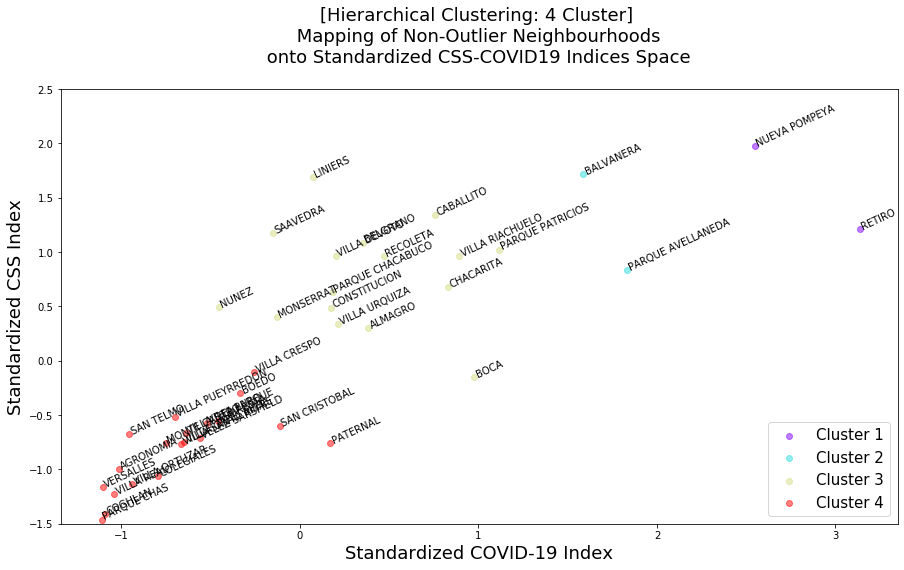

In [62]:
import matplotlib.cm as cm
print("N_Clus: ", N_Clus)
colors = cm.rainbow(np.linspace(0, 1, N_Clus))
cluster_labels_2 = list(range(1, N_Clus + 1))
print("cluster_labels: ", cluster_labels_2)
# Create a figure
plt.figure(figsize=(15,8))
s=0
clusters_already_in_the_legend = []

for color, cluster_number in zip(colors, np.asarray(cluster_labels_2).flatten()):
    
    subset = WorkingDF2[WorkingDF2.Cluster == cluster_number]    

    for i in subset.index:

        x=np.asarray(subset["Standardized COVID-19 Index"][i]).flatten()
        y=np.asarray(subset["Standardized CSS Index"][i]).flatten() 
        #name=np.array(subset['Neighbourhood'][i]).flatten 
        plt.text(x, y, str(subset['Neighbourhood'][i]), rotation=25) 
        s += 1
        
        # Keeping track of the labels so that we don't legend them multiple times.
        if cluster_number not in clusters_already_in_the_legend:
            clusters_already_in_the_legend.append(cluster_number)
            label_ = "Cluster {}".format(cluster_number)
        else:
            label_ = None
        plt.scatter(x, y, c=np.array([color]), label= label_, alpha=0.5)

plt.legend(loc='lower right', fontsize=15)
plt.xlabel('Standardized COVID-19 Index', fontsize=18)
plt.ylabel('Standardized CSS Index', fontsize=18)
plt.ylim([-1.5, 2.5])
plt.title("[Hierarchical Clustering: {} Cluster] \n Mapping of Non-Outlier Neighbourhoods \n onto Standardized CSS-COVID19 Indices Space \n ".format(N_Clus), fontsize=18)
print('# of Neighbours: ', s)
plt.savefig('Hierarchical_Cluster_rotated.jpg')
print("clusters_already_in_the_legend: ",clusters_already_in_the_legend)

N_Clus:  4
cluster_labels:  [1, 2, 3, 4]
# of Neighbours:  40
clusters_already_in_the_legend:  [1, 2, 3, 4]


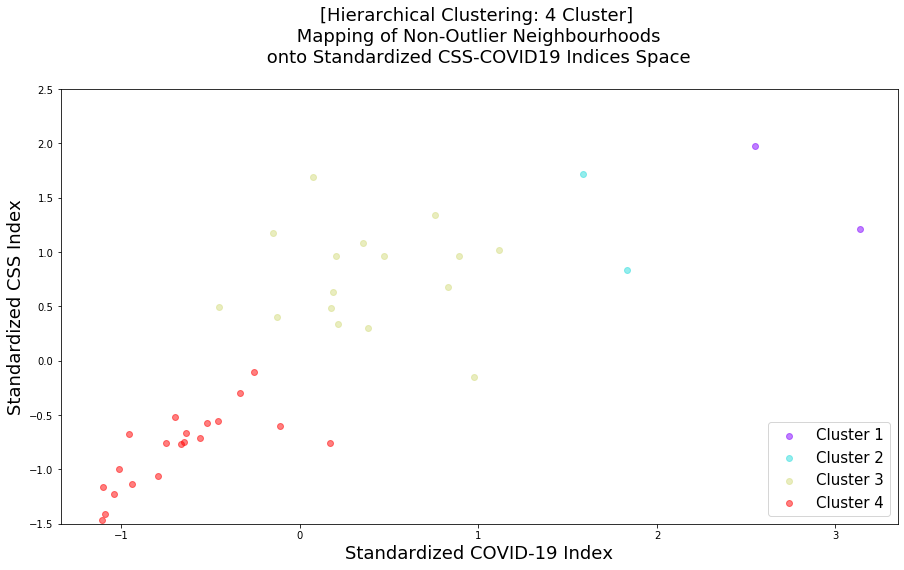

In [63]:
import matplotlib.cm as cm
print("N_Clus: ", N_Clus)
colors = cm.rainbow(np.linspace(0, 1, N_Clus))
cluster_labels_2 = list(range(1, N_Clus + 1))
print("cluster_labels: ", cluster_labels_2)
# Create a figure
plt.figure(figsize=(15,8))
s=0
clusters_already_in_the_legend = []

for color, cluster_number in zip(colors, np.asarray(cluster_labels_2).flatten()):
    
    subset = WorkingDF2[WorkingDF2.Cluster == cluster_number]    

    for i in subset.index:

        x=np.asarray(subset["Standardized COVID-19 Index"][i]).flatten()
        y=np.asarray(subset["Standardized CSS Index"][i]).flatten() 
        #name=np.array(subset['Neighbourhood'][i]).flatten 
        #plt.text(x, y, str(subset['Neighbourhood'][i]), rotation=25) 
        s += 1
        
        # Keeping track of the labels so that we don't legend them multiple times.
        if cluster_number not in clusters_already_in_the_legend:
            clusters_already_in_the_legend.append(cluster_number)
            label_ = "Cluster {}".format(cluster_number)
        else:
            label_ = None
        plt.scatter(x, y, c=np.array([color]), label= label_, alpha=0.5)

plt.legend(loc='lower right', fontsize=15)
plt.xlabel('Standardized COVID-19 Index', fontsize=18)
plt.ylabel('Standardized CSS Index', fontsize=18)
plt.ylim([-1.5, 2.5])
plt.title("[Hierarchical Clustering: {} Cluster] \n Mapping of Non-Outlier Neighbourhoods \n onto Standardized CSS-COVID19 Indices Space \n ".format(N_Clus), fontsize=18)
print('# of Neighbours: ', s)
plt.savefig('Hierarchical_Cluster_rotated.jpg')
print("clusters_already_in_the_legend: ",clusters_already_in_the_legend)

From the standardized plot, the appearance of linear relation disappeared.
Next, let's see the cluster assignments of Neighbourhoods.

In [64]:
NON_OUTLIER_Clusters=WorkingDF2[["Neighbourhood", "Cluster"]].sort_values("Cluster")
#NON_OUTLIER_Clusters.rename(columns={'Neighbourhood': 'Name'}, inplace=True)
NON_OUTLIER_Clusters

Neighbourhood  Cluster
23             RETIRO        1
16      NUEVA POMPEYA        1
2           BALVANERA        2
18  PARQUE AVELLANEDA        2
19   PARQUE CHACABUCO        3
37    VILLA RIACHUELO        3
31       VILLA DEVOTO        3
24           SAAVEDRA        3
22           RECOLETA        3
21   PARQUE PATRICIOS        3
17              NUNEZ        3
14          MONSERRAT        3
13            LINIERS        3
39      VILLA URQUIZA        3
11               BOCA        3
1             ALMAGRO        3
9        CONSTITUCION        3
6           CHACARITA        3
5           CABALLITO        3
3            BELGRANO        3
36         VILLA REAL        4
35   VILLA PUEYRREDON        4
34      VILLA ORTUZAR        4
33         VILLA LURO        4
32  VILLA GRAL. MITRE        4
30   VILLA DEL PARQUE        4
29       VILLA CRESPO        4
28          VERSALLES        4
26          SAN TELMO        4
12           PATERNAL        4
25      SAN CRISTOBAL        4
4               BOEDO        4
7             COGHLAN        4
20        PARQUE CHAS        4
38   VILLA SANTA RITA        4
8          COLEGIALES        4
10           FLORESTA        4
15       MONTE CASTRO        4
27    VELEZ SARSFIELD        4
0           AGRONOMIA        4


Now, let me characterise these 5 clusters and outlier clusters as follows:
 * Cluster 1: High Insecurity & High COVID19 Intensity Cluster
 * Cluster 2: Low Insecurity & Low COVID19 Intensity Cluster
 * Cluster 3: Medium Insecurity & Medium COVID19 Intensity Cluster
 * Cluster 4: High Insecurity & High COVID19 Intensity Cluster
 * Cluster 5: Upper-Middle Insecurity Upper-Middle COVID19 Intensity Cluster
 tentative cluster 0 in order to distinguish it from the rest which have all the data available for the analysis.
 * Cluster 6: Outlier clusters as 'Hot Spots'
 
Next, I will move on to the visualization of these clusters on the map of the city of Buenos Aires, using *__Choropleth Map__*.

## Create a Choropleth Map to show the result of both Objective 1 and Objective 2

### Data Preparation for Visualization

In order to parepare the data for mapping I will do the following.

Let me reflect 5 segmentations of these Non-Outlier clusters into the original dataframe, WorkingDF. In this process, I would do the followings:
 1. Assign the cluster number 6 to the outlier clusters in WorkingDF and define it as 'Hot spots'
 2. Recode the 5 Non-Outlier Clusters into WorkingDF.
 3. Calculate the centroids' position for these clusters: 
   * https://stackoverflow.com/questions/50332786/how-to-find-cluster-centroid-with-scikit-learn
   * https://stackoverflow.com/questions/60643219/for-hierarchical-clustering-how-to-find-the-center-in-each-cluster-in-r
 4. Grade these clusters based on the Compound Risk Metric. The grading suggests that.
   * the lower the risk grade is, the safer (lower insecurity & lower COVID-19 intensity) the cluster.
   


First, let me merge the WorkingDF and NON_OUTLIER_Clusters.

In [65]:
# Merge ('outer') WorkingDF and NON_OUTLIER_Clusters on 'Neighbourhood'
WorkingDF_Cluster = pd.merge(WorkingDF, NON_OUTLIER_Clusters, how='outer', on='Neighbourhood')
#
WorkingDF_Cluster["Cluster"]=WorkingDF_Cluster["Cluster"]
WorkingDF_Cluster.head(3)

Neighbourhood  Area in km²  Population  Population_Density  \
0     AGRONOMIA          2.1       13963         6649.047619   
1       ALMAGRO          4.1      128206        31269.756098   
2     BALVANERA          4.4      137521        31254.772727   

   Crime Severity Score (CSS)  COVID-19 Confirmed Cases  CSS Index  \
0                        1288                       166   0.193712   
1                       14406                      3251   0.460701   
2                       23474                      5372   0.751053   

   COVID-19 Index  Outlier_Clusters  Cluster  
0        0.024966                 0      4.0  
1        0.103966                 0      3.0  
2        0.171878                 0      2.0

Let me check the shape of the dataframe


In [66]:
WorkingDF_Cluster.shape

(48, 10)

Now, I will reflect 'Centroid_Grade' to the master dataframe, WorkingDF_Cluster.

In [67]:
# Merge ('outer') WorkingDF and NON_OUTLIER_Clusters on 'Neighbourhood'
WorkingDF_Cluster = pd.merge(WorkingDF_Cluster, centroid_position["Centroid_Grade"] , how='left', on='Cluster')
WorkingDF_Cluster

Neighbourhood  Area in km²  Population  Population_Density  \
0           AGRONOMIA          2.1       13963         6649.047619   
1             ALMAGRO          4.1      128206        31269.756098   
2           BALVANERA          4.4      137521        31254.772727   
3            BARRACAS          7.6       73377         9654.868421   
4            BELGRANO          6.8      126816        18649.411765   
5               BOEDO          2.6       45563        17524.230769   
6           CABALLITO          6.8      170309        25045.441176   
7           CHACARITA          3.1       25778         8315.483871   
8             COGHLAN          1.3       18021        13862.307692   
9          COLEGIALES          2.3       52391        22778.695652   
10       CONSTITUCION          2.1       41894        19949.523810   
11             FLORES          7.8      142695        18294.230769   
12           FLORESTA          2.3       37247        16194.347826   
13               BOCA          3.1       43413        14004.193548   
14           PATERNAL          2.2       19058         8662.727273   
15            LINIERS          4.3       42083         9786.744186   
16          MATADEROS          7.3       62206         8521.369863   
17          MONSERRAT          2.2       39175        17806.818182   
18       MONTE CASTRO          2.6       32782        12608.461538   
19      NUEVA POMPEYA          6.2       60465         9752.419355   
20              NUNEZ          4.5       49019        10893.111111   
21            PALERMO         15.9      225245        14166.352201   
22  PARQUE AVELLANEDA          5.1       51678        10132.941176   
23   PARQUE CHACABUCO          3.8       54638        14378.421053   
24        PARQUE CHAS          1.4       18926        13518.571429   
25   PARQUE PATRICIOS          3.7       37791        10213.783784   
26      PUERTO MADERO          2.1         406          193.333333   
27           RECOLETA          5.9      165494        28049.830508   
28             RETIRO          2.8       38635        13798.214286   
29           SAAVEDRA          5.6       48956         8742.142857   
30      SAN CRISTOBAL          2.1       46494        22140.000000   
31        SAN NICOLAS          2.3       28667        12463.913043   
32          SAN TELMO          1.2       23198        19331.666667   
33    VELEZ SARSFIELD          2.4       34084        14201.666667   
34          VERSALLES          1.4       13556         9682.857143   
35       VILLA CRESPO          3.6       83646        23235.000000   
36   VILLA DEL PARQUE          3.4       55502        16324.117647   
37       VILLA DEVOTO          6.4       67712        10580.000000   
38  VILLA GRAL. MITRE          2.2       34204        15547.272727   
39       VILLA LUGANO          9.0      108170        12018.888889   
40         VILLA LURO          2.6       31859        12253.461538   
41      VILLA ORTUZAR          1.8       21256        11808.888889   
42   VILLA PUEYRREDON          3.3       38558        11684.242424   
43         VILLA REAL          1.3       13681        10523.846154   
44    VILLA RIACHUELO          4.1       13995         3413.414634   
45   VILLA SANTA RITA          2.2       32248        14658.181818   
46      VILLA SOLDATI          8.6       39477         4590.348837   
47      VILLA URQUIZA          5.4       85587        15849.444444   

    Crime Severity Score (CSS)  COVID-19 Confirmed Cases  CSS Index  \
0                         1288                       166   0.193712   
1                        14406                      3251   0.460701   
2                        23474                      5372   0.751053   
3                        10329                      5328   1.069823   
4                        11588                      1907   0.621360   
5                         5924                      1113   0.338046   
6                        16865                      3130   0.673376   
7        

For 'Outlier Clusters', I will assign 6 to Centroid_Grade. And I will intentionally leave 'Cluster' nan.

It is because 'Cluster' was created only for 'Non-Outlier Neighbourhoods'.

In [68]:
# Fill Outlier Cluster 6 in missing cell under the column 'Cluster'
WorkingDF_Cluster["Centroid_Grade"].fillna(6, inplace=True)

#.astype(int)
#Centroid_df["Cluster Grade"]
#WorkingDF_Cluster["Cluster"]=WorkingDF_Cluster["Cluster"].astype(int)
WorkingDF_Cluster

Neighbourhood  Area in km²  Population  Population_Density  \
0           AGRONOMIA          2.1       13963         6649.047619   
1             ALMAGRO          4.1      128206        31269.756098   
2           BALVANERA          4.4      137521        31254.772727   
3            BARRACAS          7.6       73377         9654.868421   
4            BELGRANO          6.8      126816        18649.411765   
5               BOEDO          2.6       45563        17524.230769   
6           CABALLITO          6.8      170309        25045.441176   
7           CHACARITA          3.1       25778         8315.483871   
8             COGHLAN          1.3       18021        13862.307692   
9          COLEGIALES          2.3       52391        22778.695652   
10       CONSTITUCION          2.1       41894        19949.523810   
11             FLORES          7.8      142695        18294.230769   
12           FLORESTA          2.3       37247        16194.347826   
13               BOCA          3.1       43413        14004.193548   
14           PATERNAL          2.2       19058         8662.727273   
15            LINIERS          4.3       42083         9786.744186   
16          MATADEROS          7.3       62206         8521.369863   
17          MONSERRAT          2.2       39175        17806.818182   
18       MONTE CASTRO          2.6       32782        12608.461538   
19      NUEVA POMPEYA          6.2       60465         9752.419355   
20              NUNEZ          4.5       49019        10893.111111   
21            PALERMO         15.9      225245        14166.352201   
22  PARQUE AVELLANEDA          5.1       51678        10132.941176   
23   PARQUE CHACABUCO          3.8       54638        14378.421053   
24        PARQUE CHAS          1.4       18926        13518.571429   
25   PARQUE PATRICIOS          3.7       37791        10213.783784   
26      PUERTO MADERO          2.1         406          193.333333   
27           RECOLETA          5.9      165494        28049.830508   
28             RETIRO          2.8       38635        13798.214286   
29           SAAVEDRA          5.6       48956         8742.142857   
30      SAN CRISTOBAL          2.1       46494        22140.000000   
31        SAN NICOLAS          2.3       28667        12463.913043   
32          SAN TELMO          1.2       23198        19331.666667   
33    VELEZ SARSFIELD          2.4       34084        14201.666667   
34          VERSALLES          1.4       13556         9682.857143   
35       VILLA CRESPO          3.6       83646        23235.000000   
36   VILLA DEL PARQUE          3.4       55502        16324.117647   
37       VILLA DEVOTO          6.4       67712        10580.000000   
38  VILLA GRAL. MITRE          2.2       34204        15547.272727   
39       VILLA LUGANO          9.0      108170        12018.888889   
40         VILLA LURO          2.6       31859        12253.461538   
41      VILLA ORTUZAR          1.8       21256        11808.888889   
42   VILLA PUEYRREDON          3.3       38558        11684.242424   
43         VILLA REAL          1.3       13681        10523.846154   
44    VILLA RIACHUELO          4.1       13995         3413.414634   
45   VILLA SANTA RITA          2.2       32248        14658.181818   
46      VILLA SOLDATI          8.6       39477         4590.348837   
47      VILLA URQUIZA          5.4       85587        15849.444444   

    Crime Severity Score (CSS)  COVID-19 Confirmed Cases  CSS Index  \
0                         1288                       166   0.193712   
1                        14406                      3251   0.460701   
2                        23474                      5372   0.751053   
3                        10329                      5328   1.069823   
4                        11588                      1907   0.621360   
5                         5924                      1113   0.338046   
6                        16865                      3130   0.673376   
7        

## Choropleth Map
Now, let's map the cluster risk profile, 'Centroid_Grade', for all the neighbourhoods, using Choropleth Map.


In [69]:
filename

'barrios (48).geojson'

In [70]:
Buenos_Aires_map_Cluster_Rank = folium.Map(location=[-34.603722, -58.381592], zoom_start=12)
# generate choropleth map using the Cluster Rank of the city of Buenos Aires
Buenos_Aires_map_Cluster_Rank.choropleth(
    geo_data= filename,
    data=WorkingDF_Cluster,
    columns=['Neighbourhood','Centroid_Grade'],
    key_on='feature.properties.barrio',
    fill_color='Spectral_r',
    fill_opacity=0.4, 
    line_color='Blue',
    line_opacity=0.8,
    legend_name='Neighbourhood Insecurity and COVID19 Compound Cluster Grade Scale'
)
#Save the image in png file.
#Buenos_Aires_map_Cluster_Rank.savefig("Buenos_Aires_map_Cluster_Rank.png", dpi=300)

# display map
Buenos_Aires_map_Cluster_Rank


Let me also plot all the neighbourhood datapoints on the 2 dimensional risk space.
WorkingDF_Cluster

N_Clus:  6
cluster_labels:  [1, 2, 3, 4, 5, 6]
# of Neighbours:  48
clusters_already_in_the_legend:  [1, 2, 3, 4, 6]


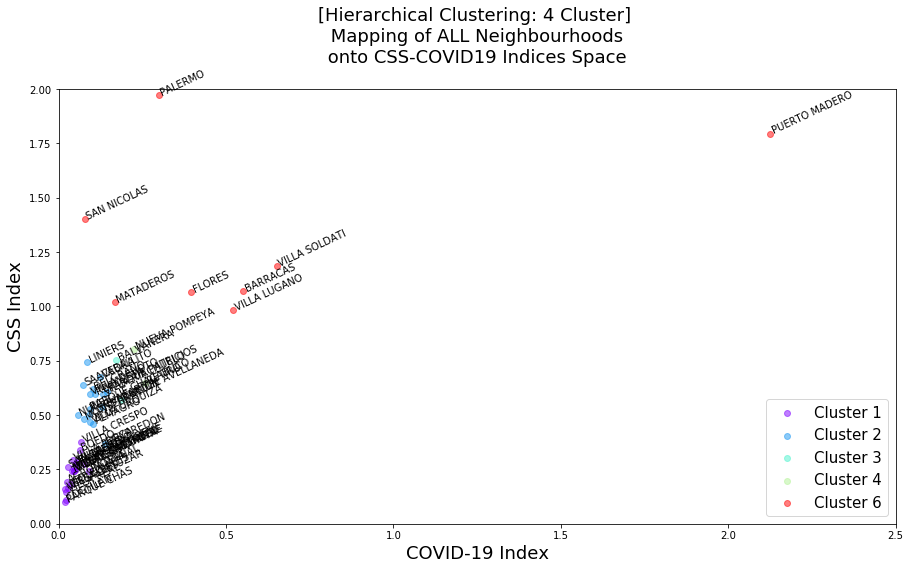

In [71]:
N_Clus2=6
import matplotlib.cm as cm
print("N_Clus: ", N_Clus2)
colors = cm.rainbow(np.linspace(0, 1, N_Clus2))
cluster_labels_3 = list(range(1, N_Clus2 + 1))
print("cluster_labels: ", cluster_labels_3)
# Create a figure
plt.figure(figsize=(15,8))
s=0
clusters_already_in_the_legend = []

for color, cluster_number in zip(colors, np.asarray(cluster_labels_3).flatten()):
    
    subset = WorkingDF_Cluster[WorkingDF_Cluster.Centroid_Grade == cluster_number]    

    for i in subset.index:

        x=np.asarray(subset["COVID-19 Index"][i]).flatten()
        y=np.asarray(subset["CSS Index"][i]).flatten() 
        #name=np.array(subset['Neighbourhood'][i]).flatten 
        plt.text(x, y, str(subset['Neighbourhood'][i]), rotation=25) 
        s += 1
        
        # Keeping track of the labels so that we don't legend them multiple times.
        if cluster_number not in clusters_already_in_the_legend:
            clusters_already_in_the_legend.append(cluster_number)
            label_ = "Cluster {}".format(cluster_number)
        else:
            label_ = None
        plt.scatter(x, y, c=np.array([color]), label= label_, alpha=0.5)

plt.legend(loc='lower right', fontsize=15)
plt.xlabel('COVID-19 Index', fontsize=18)
plt.ylabel('CSS Index', fontsize=18)
plt.ylim([0, 2])
plt.xlim([0, 2.5])
plt.title("[Hierarchical Clustering: {} Cluster] \n Mapping of ALL Neighbourhoods \n onto CSS-COVID19 Indices Space \n ".format(N_Clus), fontsize=18)
print('# of Neighbours: ', s)
plt.savefig('Hierarchical_Cluster_rotated.jpg')
print("clusters_already_in_the_legend: ",clusters_already_in_the_legend)

N_Clus:  6
cluster_labels:  [1, 2, 3, 4, 5, 6]
# of Neighbours:  48
clusters_already_in_the_legend:  [1, 2, 3, 4, 6]


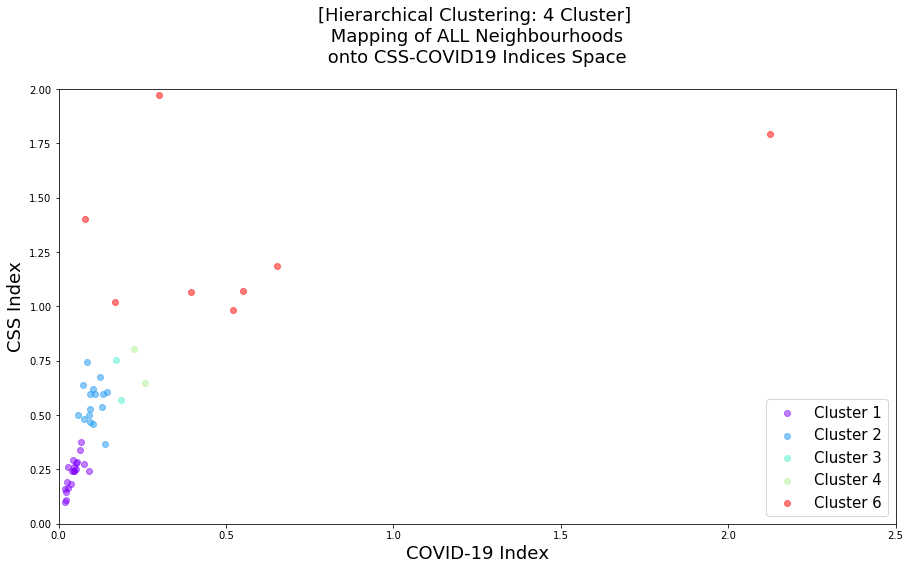

In [72]:
N_Clus2=6
import matplotlib.cm as cm
print("N_Clus: ", N_Clus2)
colors = cm.rainbow(np.linspace(0, 1, N_Clus2))
cluster_labels_3 = list(range(1, N_Clus2 + 1))
print("cluster_labels: ", cluster_labels_3)
# Create a figure
plt.figure(figsize=(15,8))
s=0
clusters_already_in_the_legend = []

for color, cluster_number in zip(colors, np.asarray(cluster_labels_3).flatten()):
    
    subset = WorkingDF_Cluster[WorkingDF_Cluster.Centroid_Grade == cluster_number]    

    for i in subset.index:

        x=np.asarray(subset["COVID-19 Index"][i]).flatten()
        y=np.asarray(subset["CSS Index"][i]).flatten() 
        #name=np.array(subset['Neighbourhood'][i]).flatten 
        #plt.text(x, y, str(subset['Neighbourhood'][i]), rotation=25) 
        s += 1
        
        # Keeping track of the labels so that we don't legend them multiple times.
        if cluster_number not in clusters_already_in_the_legend:
            clusters_already_in_the_legend.append(cluster_number)
            label_ = "Cluster {}".format(cluster_number)
        else:
            label_ = None
        plt.scatter(x, y, c=np.array([color]), label= label_, alpha=0.5)

plt.legend(loc='lower right', fontsize=15)
plt.xlabel('COVID-19 Index', fontsize=18)
plt.ylabel('CSS Index', fontsize=18)
plt.ylim([0, 2])
plt.xlim([0, 2.5])
plt.title("[Hierarchical Clustering: {} Cluster] \n Mapping of ALL Neighbourhoods \n onto CSS-COVID19 Indices Space \n ".format(N_Clus), fontsize=18)
print('# of Neighbours: ', s)
plt.savefig('Hierarchical_Cluster_rotated.jpg')
print("clusters_already_in_the_legend: ",clusters_already_in_the_legend)

Let me list up the cluster risk profile, Centroid_Grade, for all the neighbourhoods.

In [73]:
WorkingDF_Cluster[['Neighbourhood','Centroid_Grade']]

Neighbourhood  Centroid_Grade
0           AGRONOMIA             1.0
1             ALMAGRO             2.0
2           BALVANERA             3.0
3            BARRACAS             6.0
4            BELGRANO             2.0
5               BOEDO             1.0
6           CABALLITO             2.0
7           CHACARITA             2.0
8             COGHLAN             1.0
9          COLEGIALES             1.0
10       CONSTITUCION             2.0
11             FLORES             6.0
12           FLORESTA             1.0
13               BOCA             2.0
14           PATERNAL             1.0
15            LINIERS             2.0
16          MATADEROS             6.0
17          MONSERRAT             2.0
18       MONTE CASTRO             1.0
19      NUEVA POMPEYA             4.0
20              NUNEZ             2.0
21            PALERMO             6.0
22  PARQUE AVELLANEDA             3.0
23   PARQUE CHACABUCO             2.0
24        PARQUE CHAS             1.0
25   PARQUE PATRICIOS             2.0
26      PUERTO MADERO             6.0
27           RECOLETA             2.0
28             RETIRO             4.0
29           SAAVEDRA             2.0
30      SAN CRISTOBAL             1.0
31        SAN NICOLAS             6.0
32          SAN TELMO             1.0
33    VELEZ SARSFIELD             1.0
34          VERSALLES             1.0
35       VILLA CRESPO             1.0
36   VILLA DEL PARQUE             1.0
37       VILLA DEVOTO             2.0
38  VILLA GRAL. MITRE             1.0
39       VILLA LUGANO             6.0
40         VILLA LURO             1.0
41      VILLA ORTUZAR             1.0
42   VILLA PUEYRREDON             1.0
43         VILLA REAL             1.0
44    VILLA RIACHUELO             2.0
45   VILLA SANTA RITA             1.0
46      VILLA SOLDATI             6.0
47      VILLA URQUIZA             2.0

The Choropleth Map and the Centroid_Grade list will be presented to the Client as the summary presentation. 

# Part II: Foursquare API Analysis  <a name="part2"></a>

# C. Data Part II: Foursquare Venue Data <a name="data2"></a>

## Geocode

Before making queries to *__Foursquare API__*, I need to prepare a representative single point for each Neighbourhood. It is because *__Foursquare API__* starts from a single location point to operate its query: e.g. search or explore.

 * The scope of queries is only 'Non-Outlier Clusters'. Thus, I will use NON_OUTLIER_Clusters.
 * GeoJson data defines the border of the Neighbourhoods in the form of 'Polygon' data. It does not provide us with single representative location point for each Neighbourhood.

Now, I would use *__geopy's Nominatim__* to obtain the representative singple location point for each Neighbourhood.

In [78]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
A=[]
B=[]
C=[]

for barrio in NON_OUTLIER_Clusters["Neighbourhood"]:
    if barrio == "VILLA GRAL. MITRE": # Data Cleaning for "VILLA GRAL. MITRE" line 1
        Barrio = "Villa General Mitre"# Data Cleaning for "VILLA GRAL. MITRE" line 2
    else: Barrio = barrio
    address =Barrio + ' CABA'
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    A.append(location.longitude)
    B.append(location.latitude)
NON_OUTLIER_Clusters["Longitude"]=A
NON_OUTLIER_Clusters["Latitude"]=B
NON_OUTLIER_Clusters[["Neighbourhood", "Longitude", "Latitude"]]

Neighbourhood  Longitude   Latitude
23             RETIRO -58.373307 -34.591643
16      NUEVA POMPEYA -58.414710 -34.652630
2           BALVANERA -58.403140 -34.609215
18  PARQUE AVELLANEDA -58.476905 -34.649480
19   PARQUE CHACABUCO -58.438701 -34.638368
37    VILLA RIACHUELO -58.471450 -34.691206
31       VILLA DEVOTO -58.515516 -34.600994
24           SAAVEDRA -58.486276 -34.552529
22           RECOLETA -58.391570 -34.587358
21   PARQUE PATRICIOS -58.401239 -34.637482
17              NUNEZ -58.462149 -34.545348
14          MONSERRAT -58.384127 -34.611559
13            LINIERS -58.520125 -34.642403
39      VILLA URQUIZA -58.491478 -34.573241
11               BOCA -58.359042 -34.633510
1             ALMAGRO -58.422233 -34.609988
9        CONSTITUCION -58.383632 -34.624246
6           CHACARITA -58.455151 -34.587183
5           CABALLITO -58.442489 -34.620077
3            BELGRANO -58.456545 -34.561308
36         VILLA REAL -58.525877 -34.618943
35   VILLA PUEYRREDON -58.504085 -34.579448
34      VILLA ORTUZAR -58.468245 -34.581302
33         VILLA LURO -58.501508 -34.637075
32  VILLA GRAL. MITRE -58.469314 -34.610310
30   VILLA DEL PARQUE -58.493821 -34.604797
29       VILLA CRESPO -58.442474 -34.598395
28          VERSALLES -58.523299 -34.628928
26          SAN TELMO -58.373750 -34.621401
12           PATERNAL -58.470199 -34.597740
25      SAN CRISTOBAL -58.402390 -34.624060
4               BOEDO -58.418790 -34.630252
7             COGHLAN -58.474714 -34.559910
20        PARQUE CHAS -58.479305 -34.585511
38   VILLA SANTA RITA -58.482742 -34.616078
8          COLEGIALES -58.452282 -34.574515
10           FLORESTA -58.483791 -34.628105
15       MONTE CASTRO -58.505947 -34.618839
27    VELEZ SARSFIELD -58.492556 -34.631196
0           AGRONOMIA -58.485385 -34.591516

In [79]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


# <span style='color: red;'>Delete Sensitive info</span>   
<div class="alert alert-block alert-danger">
I will remove the next cell which contains my presonal info.    

All the information is in the *items* key. 

The next cell will define **get_category_type** function that extracts the venue categoey.

In [81]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

The next cell defines a function to make *__Foursquare API's 'explore' queries__* for all the neighborhoods in Buenos Aires

In [82]:
def getNearbyVenues(names, latitudes, longitudes, radius, LIMIT):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [83]:
BuenosAires_venues = getNearbyVenues(names=NON_OUTLIER_Clusters["Neighbourhood"],
                                   latitudes=NON_OUTLIER_Clusters['Latitude'],
                                   longitudes=NON_OUTLIER_Clusters['Longitude'],
                                   radius=1000, 
                                   LIMIT=10000
                                    )


RETIRO
NUEVA POMPEYA
BALVANERA
PARQUE AVELLANEDA
PARQUE CHACABUCO
VILLA RIACHUELO
VILLA DEVOTO
SAAVEDRA
RECOLETA
PARQUE PATRICIOS
NUNEZ
MONSERRAT
LINIERS
VILLA URQUIZA
BOCA
ALMAGRO
CONSTITUCION
CHACARITA
CABALLITO
BELGRANO
VILLA REAL
VILLA PUEYRREDON
VILLA ORTUZAR
VILLA LURO
VILLA GRAL. MITRE
VILLA DEL PARQUE
VILLA CRESPO
VERSALLES
SAN TELMO
PATERNAL
SAN CRISTOBAL
BOEDO
COGHLAN
PARQUE CHAS
VILLA SANTA RITA
COLEGIALES
FLORESTA
MONTE CASTRO
VELEZ SARSFIELD
AGRONOMIA


In [84]:
print(BuenosAires_venues.shape)
BuenosAires_venues.head()

(2347, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0       RETIRO             -34.591643              -58.373307   
1       RETIRO             -34.591643              -58.373307   
2       RETIRO             -34.591643              -58.373307   
3       RETIRO             -34.591643              -58.373307   
4       RETIRO             -34.591643              -58.373307   

                                         Venue  Venue Latitude  \
0  Torre Monumental (ex Torre de los Ingleses)      -34.592166   
1            Sheraton Club Lounge - 22nd Floor      -34.593213   
2                      Park Tower Buenos Aires      -34.593560   
3                        Buono Italian Kitchen      -34.593683   
4             BASA - Basement Bar & Restaurant      -34.592530   

   Venue Longitude       Venue Category  
0       -58.373752  Monument / Landmark  
1       -58.372761                Hotel  
2       -58.372863                Hotel  
3       -58.373031   Italian Restaurant  
4       -58.376948         Cocktail Bar

Now, let me make a summary stat to see the number of Foursquare responses by each neighbourhood.

In [85]:
Neighbourhood_Venue=BuenosAires_venues.groupby('Neighborhood').count().reset_index()

Neighbourhood_Venue

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  Venue  \
0           AGRONOMIA                     26                      26     26   
1             ALMAGRO                    100                     100    100   
2           BALVANERA                    100                     100    100   
3            BELGRANO                    100                     100    100   
4                BOCA                     49                      49     49   
5               BOEDO                     54                      54     54   
6           CABALLITO                    100                     100    100   
7           CHACARITA                     79                      79     79   
8             COGHLAN                     68                      68     68   
9          COLEGIALES                    100                     100    100   
10       CONSTITUCION                     67                      67     67   
11           FLORESTA                     43                      43     43   
12            LINIERS                     32                      32     32   
13          MONSERRAT                    100                     100    100   
14       MONTE CASTRO                     26                      26     26   
15      NUEVA POMPEYA                     13                      13     13   
16              NUNEZ                    100                     100    100   
17  PARQUE AVELLANEDA                     16                      16     16   
18   PARQUE CHACABUCO                     33                      33     33   
19        PARQUE CHAS                     41                      41     41   
20   PARQUE PATRICIOS                     42                      42     42   
21           PATERNAL                     28                      28     28   
22           RECOLETA                    100                     100    100   
23             RETIRO                    100                     100    100   
24           SAAVEDRA                     61                      61     61   
25      SAN CRISTOBAL                     46                      46     46   
26          SAN TELMO                    100                     100    100   
27    VELEZ SARSFIELD                     37                      37     37   
28          VERSALLES                     24                      24     24   
29       VILLA CRESPO                    100                     100    100   
30   VILLA DEL PARQUE                     56                      56     56   
31       VILLA DEVOTO                     67                      67     67   
32  VILLA GRAL. MITRE                     36                      36     36   
33         VILLA LURO                     29                      29     29   
34      VILLA ORTUZAR                     71                      71     71   
35   VILLA PUEYRREDON                     28                      28     28   
36         VILLA REAL                     34                      34     34   
37    VILLA RIACHUELO                     14                      14     14   
38   VILLA SANTA RITA                     27                      27     27   
39      VILLA URQUIZA                    100                     100    100   

    Venue Latitude  Venue Longitude  Venue Category  
0               26               26              26  
1              100              100             100  
2              100              100             100  
3              100              100             100  
4               49               49              49  
5               54               54              54  
6              100              100             100  
7               79               79              79  
8               68               68              68  
9              100              100             100  
10              67               67              67  
11              43               43              43  
12              32               32              32  
13           

Now, let me make a dataframe to show the number of Foursquare responses by each neighbourhood.

In [86]:
Neighbourhood_Venue=Neighbourhood_Venue[["Neighborhood", "Venue"]]
Neighbourhood_Venue=Neighbourhood_Venue.rename(columns={"Neighborhood": "Neighbourhood", "Venue": "Venue Response"})
Neighbourhood_Venue.head()

Neighbourhood  Venue Response
0     AGRONOMIA              26
1       ALMAGRO             100
2     BALVANERA             100
3      BELGRANO             100
4          BOCA              49

The next cell will merge the dataframe above with the master dataframe, WorkingDF_Cluster.

In [87]:
WorkingDF_Cluster = pd.merge(WorkingDF_Cluster, Neighbourhood_Venue, how='outer', on='Neighbourhood')
WorkingDF_Cluster.shape

(48, 12)

Now, let me plot the Foursquare's response among different Neighbourhoods.

Distribution of Neighbourhoods into Bins:  [ 3  7  5  4  3  1  4  1  0 12]
The ranges of the Bins:  [ 13.   21.7  30.4  39.1  47.8  56.5  65.2  73.9  82.6  91.3 100. ]


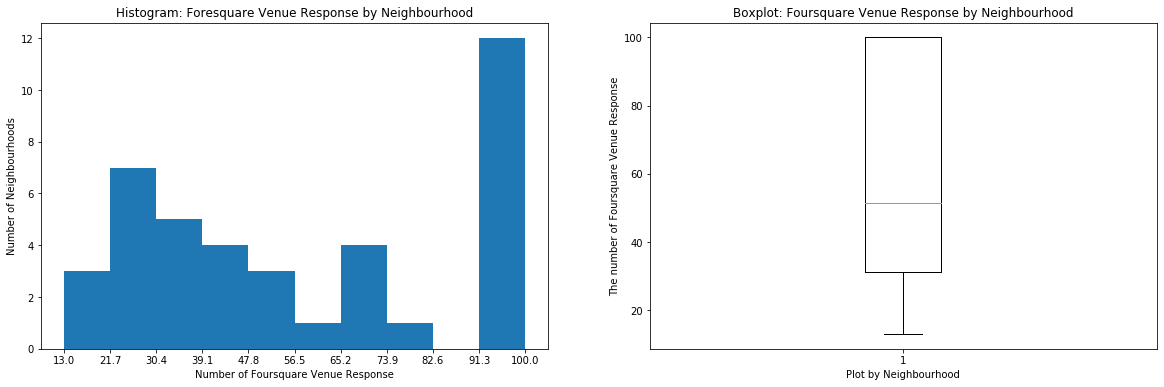

In [88]:
# Use np.histogram method to generate 10 bins out of the data
bin_count=10
count, bin_edges = np.histogram(Neighbourhood_Venue['Venue Response'], bins=bin_count)

print("Distribution of Neighbourhoods into Bins: ", count) # frequency count
print("The ranges of the Bins: ", bin_edges) # bin ranges, default = 10 bins

# Prepare for 2 Subplots Space: Histogram and Boxplot
plt.figure(figsize=(20, 6))

# Create a Histogram
plt.subplot(1,2,1)

# to divide data into 10 bins
count, bin_edges = np.histogram(Neighbourhood_Venue['Venue Response'] , bins=bin_count)
plt.title('Histogram: Foresquare Venue Response by Neighbourhood') # add a title to the histogram

plt.hist(Neighbourhood_Venue['Venue Response'] )
plt.xticks(bin_edges)
plt.ylabel('Number of Neighbourhoods') # add y-label
plt.xlabel('Number of Foursquare Venue Response') # add x-label

#plt.legend(loc='right')

plt.subplot(1,2,2)
plt.title('Boxplot: Foursquare Venue Response by Neighbourhood') # add a title to the histogram
CSS=plt.boxplot(Neighbourhood_Venue['Venue Response'])
plt.ylabel('The number of Foursquare Venue Response') # add y-label
plt.xlabel('Plot by Neighbourhood') # add x-label
#plt.xlabel("")
plt.savefig('Foursquare.jpg')

The distribution of Foursquare's response is 

Just in case, I would like to see if there is any relationship between the Foursquare’s response and the three basic profiles of neighbourhoods: area, population, and population density. I will generat the scatter matrix and the correlation matrix.

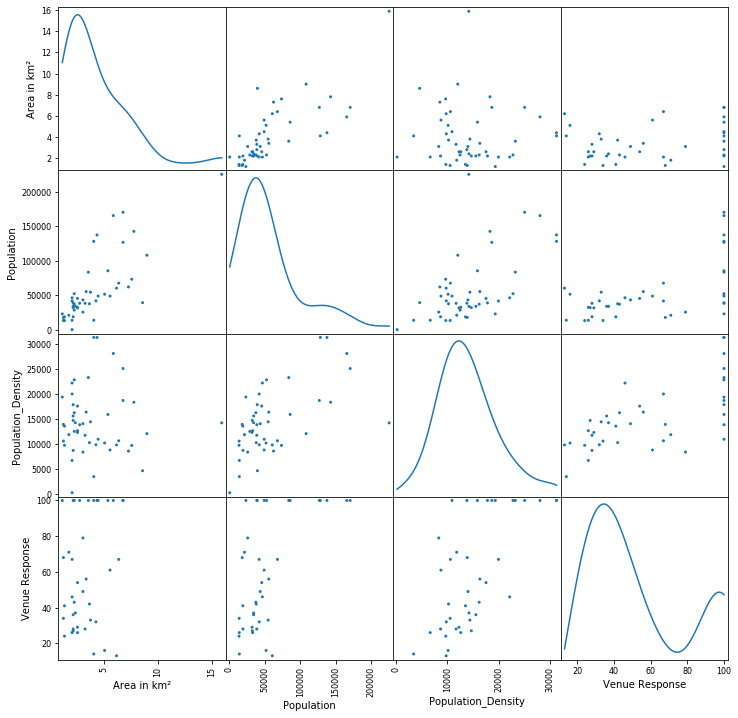

In [89]:
WorkingDF_Cluster_Screen=WorkingDF_Cluster[["Area in km²", "Population", "Population_Density", "Venue Response"]]
scatter_matrix(WorkingDF_Cluster_Screen, alpha = 1, figsize = (12, 12), diagonal = 'kde')
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
plt.savefig('scatter_matrix_selected2.jpg')
#plt.xlabel(rotation=90) 

Next, generate the correlation matrix for these variables.

In [90]:
corr2 = WorkingDF_Cluster_Screen.corr()
corr2.style.background_gradient(cmap='coolwarm')

#### Let's find out how many unique categories can be curated from all the returned venues

In [91]:
print('There are {} uniques categories.'.format(len(BuenosAires_venues['Venue Category'].unique())))

There are 232 uniques categories.


# D. Methodology and Analysis Part II: Foursquare Analysis <a name="methodology2"></a>

## Analyze Each Neighbourhood

Next, I would like to analyze the 'Venue Categories' in each neighbourhood.

As a process, I will take the following steps:
  1. Apply 'One-Hot Encoding' to map the data on the 'Venue Categories' space.
  2. Use 'groupby' to summarize the distribution of 'Venue Categories' in each Neighbourhood.
  3. Sort in descending order the 'Venue Categories' based on the density (frequency) in each Neighbourhood.
  4. Demonstrate only the top 10 'Venue Categories' for each Neighbourhood.

In [92]:
# one hot encoding
BuenosAires_onehot = pd.get_dummies(BuenosAires_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BuenosAires_onehot['Neighborhood'] = BuenosAires_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [BuenosAires_onehot.columns[-1]] + list(BuenosAires_onehot.columns[:-1])
BuenosAires_onehot = BuenosAires_onehot[fixed_columns]
print(BuenosAires_onehot.shape)
BuenosAires_onehot.head()

(2347, 233)


Neighborhood  Adult Boutique  American Restaurant  Amphitheater  Arcade  \
0       RETIRO               0                    0             0       0   
1       RETIRO               0                    0             0       0   
2       RETIRO               0                    0             0       0   
3       RETIRO               0                    0             0       0   
4       RETIRO               0                    0             0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Arts & Entertainment  ...  Vegetarian / Vegan Restaurant  \
0                     0  ...                              0   
1                     0  ...                              0   
2                     0  ...                              0   
3                     0  ...                              0   
4                     0  ...                              0   

   Venezuelan Restaurant  Veterinarian  Video Game Store  \
0                      0             0                 0   
1                      0             0                 0   
2                      0             0                 0   
3                      0             0                 0   
4                      0             0                 0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wine Shop  Women's Store  \
0                      0           0         0          0              0   
1                      0           0         0          0              0   
2                      0           0         0          0              0   
3                      0           0         0          0              0   
4                      0           0         0          0              0   

   Yoga Studio  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 233 columns]

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [93]:
BuenosAires_grouped = BuenosAires_onehot.groupby('Neighborhood').mean().reset_index()
print(BuenosAires_grouped.shape)
BuenosAires_grouped

(40, 233)


Neighborhood  Adult Boutique  American Restaurant  Amphitheater  \
0           AGRONOMIA            0.00              0.00000          0.00   
1             ALMAGRO            0.00              0.00000          0.00   
2           BALVANERA            0.01              0.00000          0.00   
3            BELGRANO            0.00              0.00000          0.00   
4                BOCA            0.00              0.00000          0.00   
5               BOEDO            0.00              0.00000          0.00   
6           CABALLITO            0.00              0.00000          0.00   
7           CHACARITA            0.00              0.00000          0.00   
8             COGHLAN            0.00              0.00000          0.00   
9          COLEGIALES            0.00              0.00000          0.00   
10       CONSTITUCION            0.00              0.00000          0.00   
11           FLORESTA            0.00              0.00000          0.00   
12            LINIERS            0.00              0.00000          0.00   
13          MONSERRAT            0.00              0.00000          0.00   
14       MONTE CASTRO            0.00              0.00000          0.00   
15      NUEVA POMPEYA            0.00              0.00000          0.00   
16              NUNEZ            0.00              0.01000          0.00   
17  PARQUE AVELLANEDA            0.00              0.00000          0.00   
18   PARQUE CHACABUCO            0.00              0.00000          0.00   
19        PARQUE CHAS            0.00              0.02439          0.00   
20   PARQUE PATRICIOS            0.00              0.00000          0.00   
21           PATERNAL            0.00              0.00000          0.00   
22           RECOLETA            0.00              0.00000          0.00   
23             RETIRO            0.00              0.00000          0.00   
24           SAAVEDRA            0.00              0.00000          0.00   
25      SAN CRISTOBAL            0.00              0.00000          0.00   
26          SAN TELMO            0.00              0.00000          0.00   
27    VELEZ SARSFIELD            0.00              0.00000          0.00   
28          VERSALLES            0.00              0.00000          0.00   
29       VILLA CRESPO            0.00              0.00000          0.01   
30   VILLA DEL PARQUE            0.00              0.00000          0.00   
31       VILLA DEVOTO            0.00              0.00000          0.00   
32  VILLA GRAL. MITRE            0.00              0.00000          0.00   
33         VILLA LURO            0.00              0.00000          0.00   
34      VILLA ORTUZAR            0.00              0.00000          0.00   
35   VILLA PUEYRREDON            0.00              0.00000          0.00   
36         VILLA REAL            0.00              0.00000          0.00   
37    VILLA RIACHUELO            0.00              0.00000          0.00   
38   VILLA SANTA RITA            0.00              0.00000          0.00   
39      VILLA URQUIZA            0.00              0.02000          0.00   

    Arcade  Argentinian Restaurant  Art Gallery  Art Museum  \
0     0.00                0.000000     0.000000    0.000000   
1     0.00                0.120000     0.000000    0.000000   
2     0.00                0.030000     0.000000    0.000000   
3     0.00                0.030000     0.000000    0.010000   
4     0.00                0.285714     0.081633    0.040816   
5     0.00                0.240741     0.018519    0.000000   
6     0.00                0.040000     0.000000    0.000000   
7     0.00                0.025316     0.000000    0.000000   
8     0.00                0.073529     0.000000    0.000000   
9     0.00                0.090000     0.000000    0.000000   
10    0.00                0.104478     0.000000    0.000000   
11    0.00                0.069767     0.000000    0.000000   
12    0.00                0.062500     0.000000    0.000000   
13    0.00

The next cell defines a function to sort the venues in descending order.

In [94]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

The next cell creates the new dataframe and display the top 10 venues for each neighborhood.

In [95]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = BuenosAires_grouped['Neighborhood']

for ind in np.arange(BuenosAires_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BuenosAires_grouped.iloc[ind, :], num_top_venues)
print(neighborhoods_venues_sorted.shape)


(40, 11)


Next, let's merge the top  venue list and WorkingDF_Cluster, the updated workind dataframe for all the Neighbourhoods.

In [96]:
neighborhoods_venues_sorted.rename(columns={"Neighborhood": "Neighbourhood"}, inplace=True)
#neighborhoods_venues_sorted
WorkingDF_Cluster=pd.merge(WorkingDF_Cluster, neighborhoods_venues_sorted, how='outer', on='Neighbourhood')

In [97]:
print(WorkingDF_Cluster.shape)
WorkingDF_Cluster

(48, 22)


Neighbourhood  Area in km²  Population  Population_Density  \
0           AGRONOMIA          2.1       13963         6649.047619   
1             ALMAGRO          4.1      128206        31269.756098   
2           BALVANERA          4.4      137521        31254.772727   
3            BARRACAS          7.6       73377         9654.868421   
4            BELGRANO          6.8      126816        18649.411765   
5               BOEDO          2.6       45563        17524.230769   
6           CABALLITO          6.8      170309        25045.441176   
7           CHACARITA          3.1       25778         8315.483871   
8             COGHLAN          1.3       18021        13862.307692   
9          COLEGIALES          2.3       52391        22778.695652   
10       CONSTITUCION          2.1       41894        19949.523810   
11             FLORES          7.8      142695        18294.230769   
12           FLORESTA          2.3       37247        16194.347826   
13               BOCA          3.1       43413        14004.193548   
14           PATERNAL          2.2       19058         8662.727273   
15            LINIERS          4.3       42083         9786.744186   
16          MATADEROS          7.3       62206         8521.369863   
17          MONSERRAT          2.2       39175        17806.818182   
18       MONTE CASTRO          2.6       32782        12608.461538   
19      NUEVA POMPEYA          6.2       60465         9752.419355   
20              NUNEZ          4.5       49019        10893.111111   
21            PALERMO         15.9      225245        14166.352201   
22  PARQUE AVELLANEDA          5.1       51678        10132.941176   
23   PARQUE CHACABUCO          3.8       54638        14378.421053   
24        PARQUE CHAS          1.4       18926        13518.571429   
25   PARQUE PATRICIOS          3.7       37791        10213.783784   
26      PUERTO MADERO          2.1         406          193.333333   
27           RECOLETA          5.9      165494        28049.830508   
28             RETIRO          2.8       38635        13798.214286   
29           SAAVEDRA          5.6       48956         8742.142857   
30      SAN CRISTOBAL          2.1       46494        22140.000000   
31        SAN NICOLAS          2.3       28667        12463.913043   
32          SAN TELMO          1.2       23198        19331.666667   
33    VELEZ SARSFIELD          2.4       34084        14201.666667   
34          VERSALLES          1.4       13556         9682.857143   
35       VILLA CRESPO          3.6       83646        23235.000000   
36   VILLA DEL PARQUE          3.4       55502        16324.117647   
37       VILLA DEVOTO          6.4       67712        10580.000000   
38  VILLA GRAL. MITRE          2.2       34204        15547.272727   
39       VILLA LUGANO          9.0      108170        12018.888889   
40         VILLA LURO          2.6       31859        12253.461538   
41      VILLA ORTUZAR          1.8       21256        11808.888889   
42   VILLA PUEYRREDON          3.3       38558        11684.242424   
43         VILLA REAL          1.3       13681        10523.846154   
44    VILLA RIACHUELO          4.1       13995         3413.414634   
45   VILLA SANTA RITA          2.2       32248        14658.181818   
46      VILLA SOLDATI          8.6       39477         4590.348837   
47      VILLA URQUIZA          5.4       85587        15849.444444   

    Crime Severity Score (CSS)  COVID-19 Confirmed Cases  CSS Index  \
0                         1288                       166   0.193712   
1                        14406                      3251   0.460701   
2                        23474                      5372   0.751053   
3                        10329                      5328   1.069823   
4                        11588                      1907   0.621360   
5                         5924                      1113   0.338046   
6                        16865                      3130   0.673376   
7        

Let me organize this information and create a new dataframe in the following priority:
  1. Cluster_Grade in ascending order
  2. Venue Response in descending order
In this way, I can list up neighbourhoods from the safest cluster with the most popular venue.  
Then, let me display the following items:
 * Neighbourhood
 * Cluster_Grade
 * Venue Response
 * Top 5 List of Popular Venues

In [98]:
TopFive_PopularVenue=WorkingDF_Cluster[["Neighbourhood", "Centroid_Grade", "Venue Response", "1st Most Common Venue", "2nd Most Common Venue", "3rd Most Common Venue", "4th Most Common Venue", "5th Most Common Venue"]]
#, "6th Most Common Venue", "7th Most Common Venue", "8th Most Common Venue", "9th Most Common Venue", "10th Most Common Venue"
TopFive_PopularVenue
#.head(3)


Neighbourhood  Centroid_Grade  Venue Response  \
0           AGRONOMIA             1.0            26.0   
1             ALMAGRO             2.0           100.0   
2           BALVANERA             3.0           100.0   
3            BARRACAS             6.0             NaN   
4            BELGRANO             2.0           100.0   
5               BOEDO             1.0            54.0   
6           CABALLITO             2.0           100.0   
7           CHACARITA             2.0            79.0   
8             COGHLAN             1.0            68.0   
9          COLEGIALES             1.0           100.0   
10       CONSTITUCION             2.0            67.0   
11             FLORES             6.0             NaN   
12           FLORESTA             1.0            43.0   
13               BOCA             2.0            49.0   
14           PATERNAL             1.0            28.0   
15            LINIERS             2.0            32.0   
16          MATADEROS             6.0             NaN   
17          MONSERRAT             2.0           100.0   
18       MONTE CASTRO             1.0            26.0   
19      NUEVA POMPEYA             4.0            13.0   
20              NUNEZ             2.0           100.0   
21            PALERMO             6.0             NaN   
22  PARQUE AVELLANEDA             3.0            16.0   
23   PARQUE CHACABUCO             2.0            33.0   
24        PARQUE CHAS             1.0            41.0   
25   PARQUE PATRICIOS             2.0            42.0   
26      PUERTO MADERO             6.0             NaN   
27           RECOLETA             2.0           100.0   
28             RETIRO             4.0           100.0   
29           SAAVEDRA             2.0            61.0   
30      SAN CRISTOBAL             1.0            46.0   
31        SAN NICOLAS             6.0             NaN   
32          SAN TELMO             1.0           100.0   
33    VELEZ SARSFIELD             1.0            37.0   
34          VERSALLES             1.0            24.0   
35       VILLA CRESPO             1.0           100.0   
36   VILLA DEL PARQUE             1.0            56.0   
37       VILLA DEVOTO             2.0            67.0   
38  VILLA GRAL. MITRE             1.0            36.0   
39       VILLA LUGANO             6.0             NaN   
40         VILLA LURO             1.0            29.0   
41      VILLA ORTUZAR             1.0            71.0   
42   VILLA PUEYRREDON             1.0            28.0   
43         VILLA REAL             1.0            34.0   
44    VILLA RIACHUELO             2.0            14.0   
45   VILLA SANTA RITA             1.0            27.0   
46      VILLA SOLDATI             6.0             NaN   
47      VILLA URQUIZA             2.0           100.0   

        1st Most Common Venue   2nd Most Common Venue   3rd Most Common Venue  \
0                       Plaza                Bus Stop            Soccer Field   
1      Argentinian Restaurant          Ice Cream Shop             Pizza Place   
2                        Café                     Gym             Coffee Shop   
3                         NaN                     NaN                     NaN   
4                 Coffee Shop          Ice Cream Shop                    Café   
5      Argentinian Restaurant             Pizza Place                  Bakery   
6              Ice Cream Shop                    Café             Coffee Shop   
7                        Café              Restaurant             Pizza Place   
8                 Pizza Place  Argentinian Restaurant                  Bakery   
9      Argentinian Restaurant          Ice Cream Shop                  Bakery   
10     Argentinian Restaurant                   Hotel                    Café   
11                        NaN                     NaN                     NaN   
12  Middle Eastern Restaurant          Ice Cream Shop              Restaurant   
13     Argentinian Restaurant                    Café             Art Gallery   

# Final Products <a name="final"></a>

In [99]:
# Modity the datatype for Centroid_Grade and Venue Response
Sorted_TopFive_PopularVenue=TopFive_PopularVenue.sort_values(["Centroid_Grade", "Venue Response"], ascending=[True, False]).reset_index()
CG=Sorted_TopFive_PopularVenue.iloc[:, 2].fillna(0).apply(int)
VR=Sorted_TopFive_PopularVenue.iloc[:, 3].fillna(0).apply(int)
Sorted_TopFive_PopularVenue["Centroid_Grade"]=CG
Sorted_TopFive_PopularVenue["Venue Response"]=VR
Sorted_TopFive_PopularVenue=Sorted_TopFive_PopularVenue[:40].drop(columns=["index"])
Sorted_TopFive_PopularVenue

Neighbourhood  Centroid_Grade  Venue Response  \
0          COLEGIALES               1             100   
1           SAN TELMO               1             100   
2        VILLA CRESPO               1             100   
3       VILLA ORTUZAR               1              71   
4             COGHLAN               1              68   
5    VILLA DEL PARQUE               1              56   
6               BOEDO               1              54   
7       SAN CRISTOBAL               1              46   
8            FLORESTA               1              43   
9         PARQUE CHAS               1              41   
10    VELEZ SARSFIELD               1              37   
11  VILLA GRAL. MITRE               1              36   
12         VILLA REAL               1              34   
13         VILLA LURO               1              29   
14           PATERNAL               1              28   
15   VILLA PUEYRREDON               1              28   
16   VILLA SANTA RITA               1              27   
17          AGRONOMIA               1              26   
18       MONTE CASTRO               1              26   
19          VERSALLES               1              24   
20            ALMAGRO               2             100   
21           BELGRANO               2             100   
22          CABALLITO               2             100   
23          MONSERRAT               2             100   
24              NUNEZ               2             100   
25           RECOLETA               2             100   
26      VILLA URQUIZA               2             100   
27          CHACARITA               2              79   
28       CONSTITUCION               2              67   
29       VILLA DEVOTO               2              67   
30           SAAVEDRA               2              61   
31               BOCA               2              49   
32   PARQUE PATRICIOS               2              42   
33   PARQUE CHACABUCO               2              33   
34            LINIERS               2              32   
35    VILLA RIACHUELO               2              14   
36          BALVANERA               3             100   
37  PARQUE AVELLANEDA               3              16   
38             RETIRO               4             100   
39      NUEVA POMPEYA               4              13   

        1st Most Common Venue   2nd Most Common Venue   3rd Most Common Venue  \
0      Argentinian Restaurant          Ice Cream Shop                  Bakery   
1      Argentinian Restaurant                     Bar               BBQ Joint   
2                 Pizza Place  Argentinian Restaurant                    Café   
3                   BBQ Joint                    Café                  Bakery   
4                 Pizza Place  Argentinian Restaurant                  Bakery   
5                        Café                Pharmacy                     Bar   
6      Argentinian Restaurant             Pizza Place                  Bakery   
7                 Pizza Place           Grocery Store                 Theater   
8   Middle Eastern Restaurant          Ice Cream Shop              Restaurant   
9                 Pizza Place                    Café             Coffee Shop   
10     Argentinian Restaurant           Deli / Bodega          Ice Cream Shop   
11                Pizza Place          Ice Cream Shop                Bus Stop   
12                   Bus Stop                     Gym  Argentinian Restaurant   
13     Argentinian Restaurant             Pizza Place                   Plaza   
14                   Bus Stop             Pizza Place             Art Gallery   
15             Ice Cream Shop               BBQ Joint                   Plaza   
16             Ice Cream Shop             Pizza Place                    Café   
17                      Plaza                Bus Stop            Soccer Field   
18                Pizza Place                   Plaza    Gym / Fitness Center   
19                   Bus Stop  Argentinian Restaur

Attach the geographical coordinate to the Sorted_TopFive_PopularVenue dataframe

In [100]:
Geo_Coordinates_BA=NON_OUTLIER_Clusters[["Neighbourhood", "Longitude", "Latitude"]]
Pop_Up=pd.merge(Sorted_TopFive_PopularVenue, Geo_Coordinates_BA, how='left', on='Neighbourhood')
Pop_Up.head(3)

Neighbourhood  Centroid_Grade  Venue Response   1st Most Common Venue  \
0    COLEGIALES               1             100  Argentinian Restaurant   
1     SAN TELMO               1             100  Argentinian Restaurant   
2  VILLA CRESPO               1             100             Pizza Place   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0          Ice Cream Shop                Bakery                  Café   
1                     Bar             BBQ Joint                Hostel   
2  Argentinian Restaurant                  Café             BBQ Joint   

  5th Most Common Venue  Longitude   Latitude  
0           Coffee Shop -58.452282 -34.574515  
1           Coffee Shop -58.373750 -34.621401  
2        Ice Cream Shop -58.442474 -34.598395

Generate marker contents to describe the cluster risk grade (Centroid_Grade) and the top 3 venue categories. 

In [101]:
#Sorted_TopFive_PopularVenue
length=Pop_Up.shape[0]
print('length =', length)
L2=[]
print("L2 =", L2)
Pop_Up.shape


length = 40
L2 = []


(40, 10)

In [102]:
for i in range(length):  
#    print("i =", i)
    if Pop_Up.loc[i, "Centroid_Grade"].astype(int)==6:
        L2.append("{} is a high risk outlier neighbourhood".format(Pop_Up.loc[i, "Neighbourhood"], Pop_Up.loc[i, "Centroid_Grade"].astype(int)))
    else:
        L2.append("{}; Cluster Risk Grade {}: Top Category: {}; 2nd: {}; 3rd: {}".format(Pop_Up.loc[i, "Neighbourhood"], Pop_Up.loc[i, "Centroid_Grade"], Pop_Up.loc[i, "1st Most Common Venue"], Pop_Up.loc[i, "2nd Most Common Venue"], Pop_Up.loc[i, "3rd Most Common Venue"]))
                 #.format(Pop_Up.loc[i, "Neighbourhood"], Pop_Up.loc[i, "Centroid_Grade"]))
                 #
#        L.append("{}; Cluster Risk Grade {}: Top Category: {}; 2nd: {}; 3rd: {}; 4th: {}; 5th: {}".format(Pop_Up.loc[i, "Neighbourhood"], Pop_Up.loc[i, "Centroid_Grade"], Pop_Up.loc[i, "1st Most Common Venue"], Pop_Up.loc[i, "2nd Most Common Venue"], Pop_Up.loc[i, "3rd Most Common Venue"]), Pop_Up.loc[i, "4th Most Common Venue"], Pop_Up.loc[i, "5th Most Common Venue"]))          
#L2
Pop_Up["Pop_Up_Label"]=L2
Pop_Up["Pop_Up_Label"]

0     COLEGIALES; Cluster Risk Grade 1: Top Category...
1     SAN TELMO; Cluster Risk Grade 1: Top Category:...
2     VILLA CRESPO; Cluster Risk Grade 1: Top Catego...
3     VILLA ORTUZAR; Cluster Risk Grade 1: Top Categ...
4     COGHLAN; Cluster Risk Grade 1: Top Category: P...
5     VILLA DEL PARQUE; Cluster Risk Grade 1: Top Ca...
6     BOEDO; Cluster Risk Grade 1: Top Category: Arg...
7     SAN CRISTOBAL; Cluster Risk Grade 1: Top Categ...
8     FLORESTA; Cluster Risk Grade 1: Top Category: ...
9     PARQUE CHAS; Cluster Risk Grade 1: Top Categor...
10    VELEZ SARSFIELD; Cluster Risk Grade 1: Top Cat...
11    VILLA GRAL. MITRE; Cluster Risk Grade 1: Top C...
12    VILLA REAL; Cluster Risk Grade 1: Top Category...
13    VILLA LURO; Cluster Risk Grade 1: Top Category...
14    PATERNAL; Cluster Risk Grade 1: Top Category: ...
15    VILLA PUEYRREDON; Cluster Risk Grade 1: Top Ca...
16    VILLA SANTA RITA; Cluster Risk Grade 1: Top Ca...
17    AGRONOMIA; Cluster Risk Grade 1: Top Categ

## Map the profiled of Neighbourhoods

In [103]:
Pop_Up_2=Pop_Up[:40]
print("Shape: ", Pop_Up_2.shape)
Pop_Up_2.head(3)

Shape:  (40, 11)


Neighbourhood  Centroid_Grade  Venue Response   1st Most Common Venue  \
0    COLEGIALES               1             100  Argentinian Restaurant   
1     SAN TELMO               1             100  Argentinian Restaurant   
2  VILLA CRESPO               1             100             Pizza Place   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0          Ice Cream Shop                Bakery                  Café   
1                     Bar             BBQ Joint                Hostel   
2  Argentinian Restaurant                  Café             BBQ Joint   

  5th Most Common Venue  Longitude   Latitude  \
0           Coffee Shop -58.452282 -34.574515   
1           Coffee Shop -58.373750 -34.621401   
2        Ice Cream Shop -58.442474 -34.598395   

                                        Pop_Up_Label  
0  COLEGIALES; Cluster Risk Grade 1: Top Category...  
1  SAN TELMO; Cluster Risk Grade 1: Top Category:...  
2  VILLA CRESPO; Cluster Risk Grade 1: Top Catego...

In [104]:

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(Pop_Up_2.Latitude, Pop_Up_2.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
# add pop-up text to each marker on the map
latitudes = list(Pop_Up_2.Latitude)
longitudes = list(Pop_Up_2.Longitude)
labels = list(Pop_Up_2.Pop_Up_Label)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(Buenos_Aires_map_Cluster_Rank)
    
# add incidents to map
Buenos_Aires_map_Cluster_Rank.add_child(incidents)


#  *_Clustering Structure among Neighbourhoods in terms of Top10 Common Venue Categories_*

Next, I would like to study if there is meaningful underlying clustering structure among the Neighbourhoods in terms of Top10 Common Venues Data.

In order to do so, I would like to search appropriate number of cluster using two methods:
  * Silhouette Coefficient Scores
  * K-Means Elbow

For both measures, I will base the K-Means clustering.


# Silhouette Coefficient: a Validation measure for K-Means Clustering

The source of the exercise below is: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html 

> Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].
>
> Cut a long story short, the best value is 1, the worst -1.
> * Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. Which means, the sample is distinguished from the points belonging to other clusters.
> * A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
> * Negative values, (-1,0), indicate that those samples might have been assigned to the wrong cluster.


In [105]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


import matplotlib.cm as cm
import numpy as np
print(__doc__)

Automatically created module for IPython interactive environment


In [106]:
BuenosAires_grouped_clustering = BuenosAires_grouped.drop('Neighborhood', 1)
BuenosAires_grouped_clustering.shape

(40, 232)

## Normalization
First, I need to normalize the data.

In [107]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

BuenosAires_grouped_clustering_standardized=StandardScaler().fit_transform(BuenosAires_grouped_clustering)

For n_clusters = 2 The average silhouette_score is : 0.20658183910151734
For n_clusters = 3 The average silhouette_score is : 0.1625701817745959
For n_clusters = 4 The average silhouette_score is : 0.11082897795947526
For n_clusters = 5 The average silhouette_score is : 0.04085931471514218


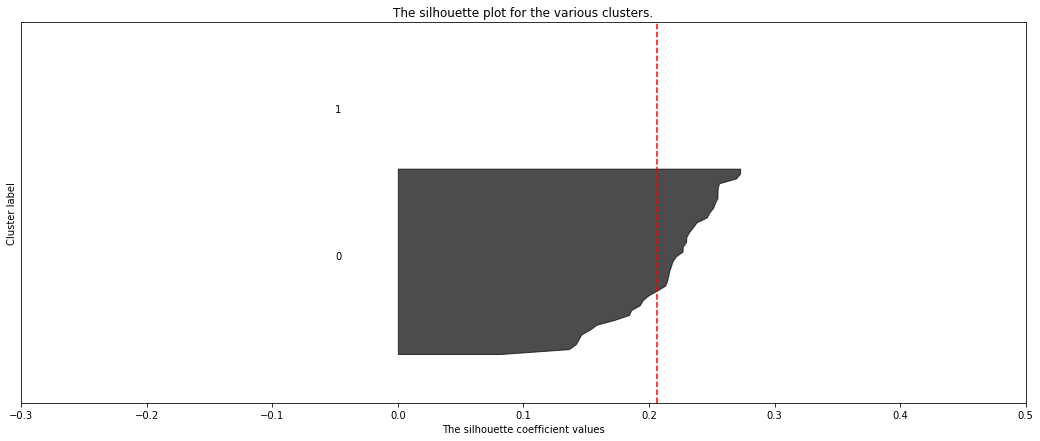

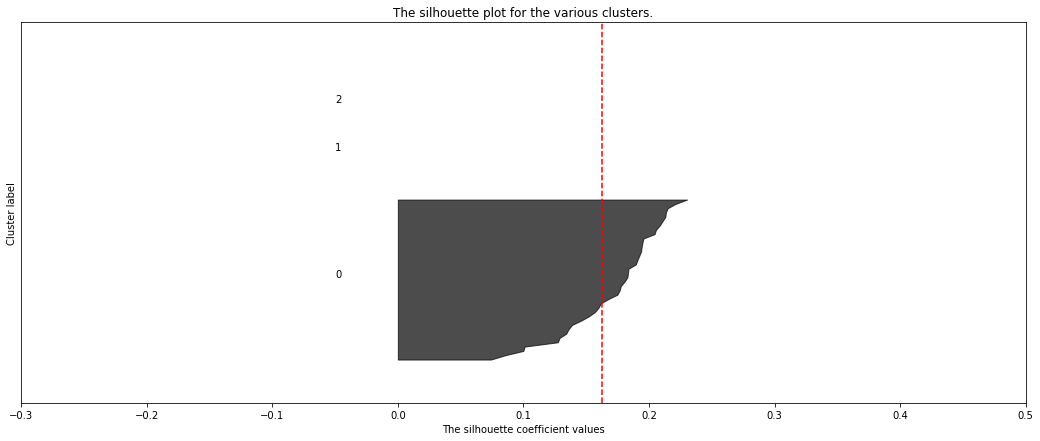

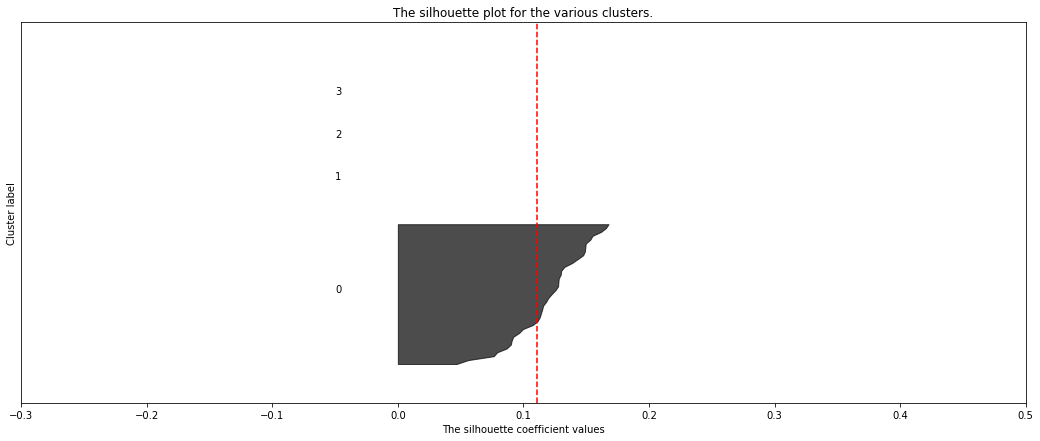

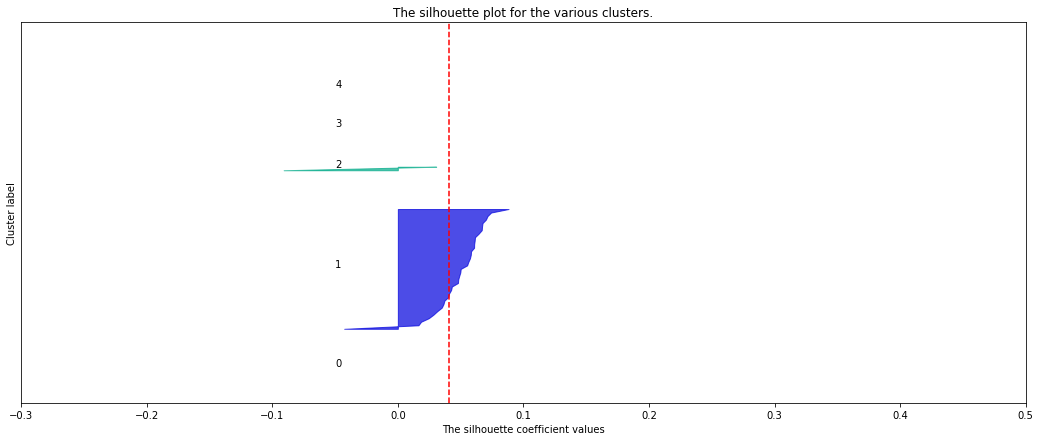

In [108]:

range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    
    ax1.set_xlim([-0.3, 0.5])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(BuenosAires_grouped_clustering_standardized)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(BuenosAires_grouped_clustering_standardized, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(BuenosAires_grouped_clustering_standardized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5])
    plt.savefig('Silhouette_Score{}.jpg'.format(n_clusters))

plt.show()


All these plots demonstrate low value for the silhouette coefficient values. No plot suggests meaningful silhouette coefficient scores (ideally large enough toward 1). This suggests that there is no meaningful clustering for the data. Let me try another measure *__K-Mean Elbow Method__*

## K-Mean Elbow Method
Let me check if another measure, K-Mean Elbow Method, can provide me with a solution.
Here is a reference about the method: https://predictivehacks.com/k-means-elbow-method-code-for-python/


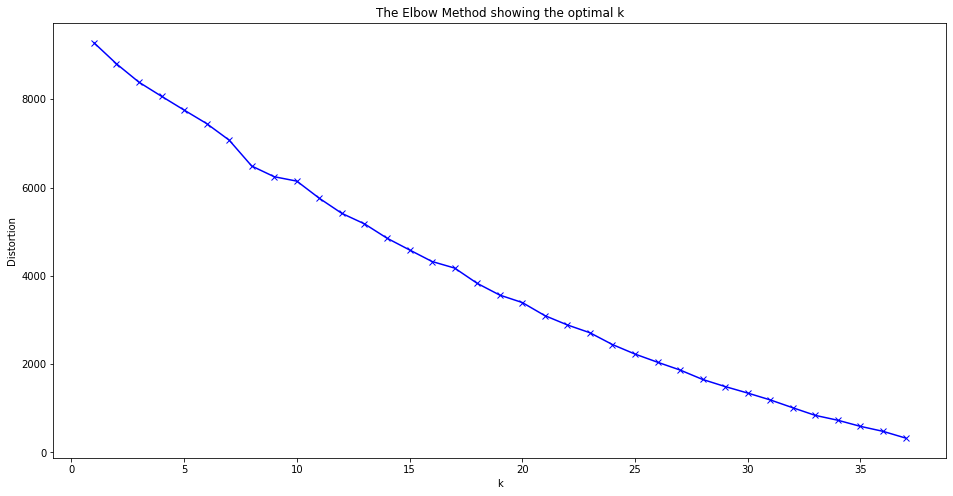

In [109]:
df=BuenosAires_grouped_clustering_standardized
distortions = []
K = range(1,38)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('K_Means_Elbow.jpg')
plt.show() 


I run the method for the number of cluster from 1 to the total number of the Neighbourhood (total division). In other words, toward the iteration the Neighbourhoods was divided into individual pieaces. Unfortunately, there is no kink in the slope. In other words, the distance did not converge at some point. That means: the distance continued to diminish as K increases. This suggests that there is no meaningful clustering solution.

Cut a long story short, I could not arrive any meaningful cluster for the Foursquare data for the city of Buenos Aires. This might be the characteristic of the city. Or, as one possibility, it might be due to the poor quality of the foursquare data for the city of Buenos Aires, when compared with other comparably large cities. There might not be much consistent information building for the city. This would require further analysis, but beyond the scope of the project.

Whatever real reason it might be, all I know from these tuning results is that there is no convincing implication regarding the underlying cluster structure in the given data. In order to avoid an unreliable and misleading inference, I would rather refrain from performing K-Means Clustering Model for the given dataset. And I would rather prepare summary materials so that the Client can use their human insight/domain expertise to explore them and identify the popular venue profiles of neighbourhoods.


Thanks for Viewing my Code!